# Assignment 4 | Data set | Churn Analysis

### Clustering Algorithms: 
#### 1.K-means 
#### 2.Expectation Maximization <br>
### Dimensionality reduction algorithms 
#### 1.Any one feature selection algorithm (decision tree, forward selection, backward elimination, etc.)
#### 2.PCA
#### 3.ICA
#### 4.Randomized Projections
<br>
### Experimentations:
#### ANN with Dimensionality reduction
#### Submitted By :
#### Pranav Shil

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [31]:
data = pd.read_csv("student-mat.csv",sep = ";")
median = data['G3'].median()
data['G3'] = np.where(data['G3']>=median, 1, 0)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,0


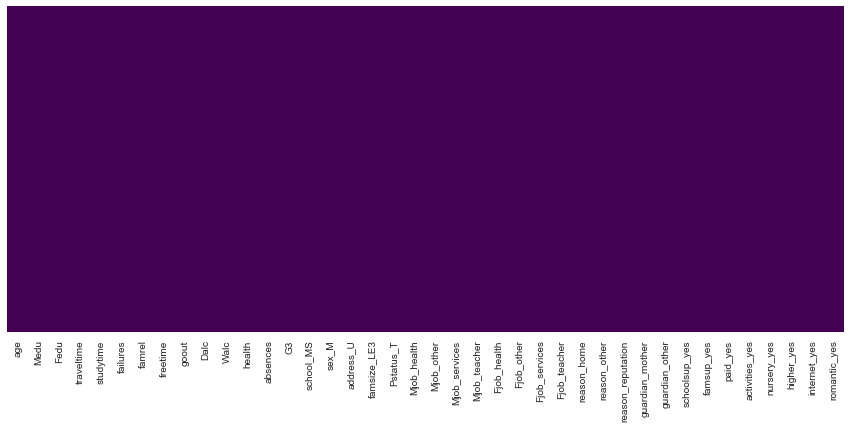

In [32]:
data = data.drop(["G1","G2"], axis=1)
data = pd.get_dummies(data,drop_first = True)
df= data.replace(' ', np.NaN)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
# Checking Missing Values
df.isnull().sum()

age                  0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
failures             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
G3                   0
school_MS            0
sex_M                0
address_U            0
famsize_LE3          0
Pstatus_T            0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_home          0
reason_other         0
reason_reputation    0
guardian_mother      0
guardian_other       0
schoolsup_yes        0
famsup_yes           0
paid_yes             0
activities_yes       0
nursery_yes          0
higher_yes           0
internet_yes         0
romantic_yes         0
dtype: int64

In [34]:
df.columns


Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3',
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [35]:
import seaborn as sns


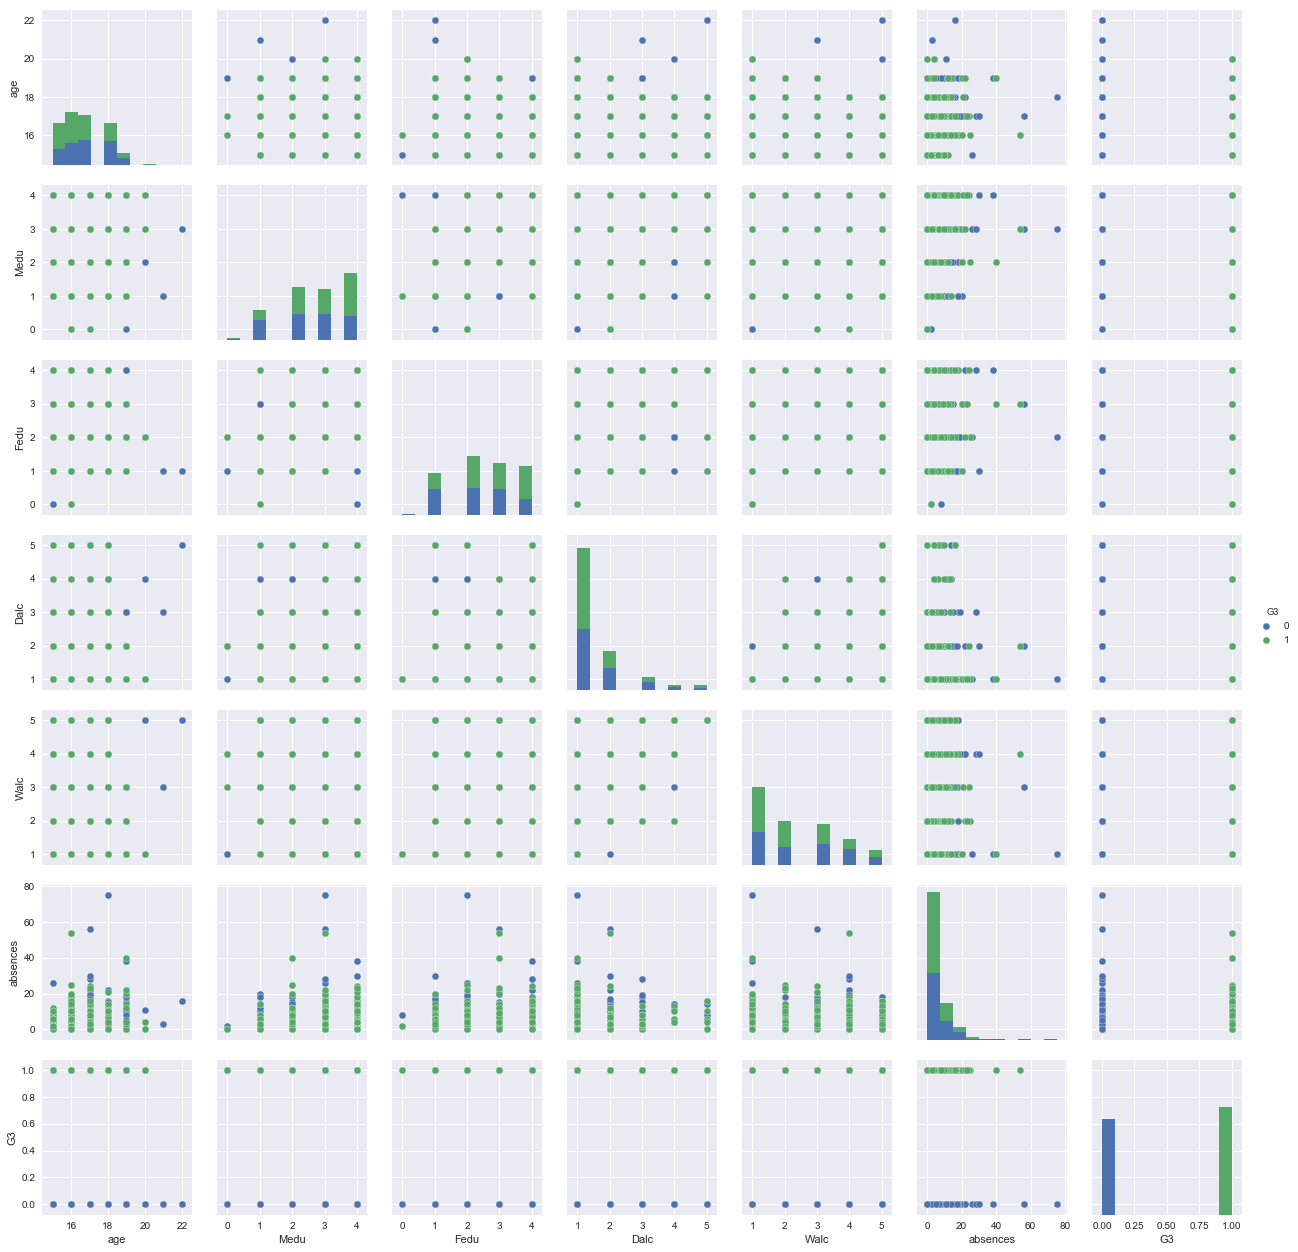

In [36]:
sns.pairplot(df[['age', 'Medu', 'Fedu', 'Dalc', 'Walc', 'absences', 'G3']],hue="G3")

#### Creating K- Means object with n_clusters = 2

In [37]:
from sklearn.cluster import KMeans

In [41]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [42]:
kmeans = KMeans(n_clusters=2,random_state=0)
X=df.drop(['G3'], axis = 1)
X = sc.fit_transform(X)
y=df['G3']

In [43]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [44]:
kmeans.cluster_centers_

array([[-0.27284249,  0.65420985,  0.61219737, -0.2154994 ,  0.12643041,
        -0.27314072, -0.02240185, -0.02337801,  0.0065663 , -0.04678294,
        -0.08106458, -0.00282694,  0.00735848, -0.17411084,  0.05323985,
         0.13486208,  0.02068394, -0.07365683,  0.26932845, -0.46043997,
         0.21131097,  0.41276236,  0.19318628, -0.37328538,  0.17257908,
         0.28006542, -0.01850729,  0.0342968 ,  0.06135882,  0.08913829,
        -0.20435845,  0.05174285,  0.27674948,  0.23588409,  0.17422503,
         0.2702273 ,  0.20790442,  0.24481924, -0.00178901],
       [ 0.27422747, -0.65753072, -0.61530498,  0.21659331, -0.12707219,
         0.27452722,  0.02251557,  0.02349668, -0.00659963,  0.04702041,
         0.08147607,  0.00284129, -0.00739583,  0.17499465, -0.0535101 ,
        -0.13554666, -0.02078893,  0.07403072, -0.2706956 ,  0.46277723,
        -0.21238362, -0.4148576 , -0.19416692,  0.37518023, -0.17345511,
        -0.28148707,  0.01860124, -0.0344709 , -0.06167029, -0.

In [45]:
predictions = kmeans.fit_predict(X)

In [46]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['G3'],predictions))

[[ 75 111]
 [123  86]]


#### Every time, if the accuracy is less than 50% , I will predict the opposite results, i.e. 1 to 0 and vice versa,
#### Because prediction can not go below 50% for a binary output

In [47]:
acc= round(100*accuracy_score(df['G3'],predictions),2)

if acc < 50:
    predictions = np.where(predictions == 0, 1,0)
    
acc= round(100*accuracy_score(df['G3'],predictions),2)

print("Accuracy =", acc,"%")

Accuracy = 59.24 %


### Expectation Maximization | Gaussian Mixture

In [48]:
from sklearn.mixture import GaussianMixture

#kmeans = KMeans(n_clusters=2,random_state=0)
Gaussian = GaussianMixture(n_components=2,random_state=0 )#covariance_type='tied')
Gaussian.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [49]:
probs = Gaussian.predict_proba(X)
Gaussian.score_samples(X)
predictions = Gaussian.predict(X)

In [51]:
print(confusion_matrix(df['G3'],predictions))

[[ 47 139]
 [ 69 140]]


In [52]:
acc= round(100*accuracy_score(df['G3'],predictions),2)

if acc < 50:
    predictions = np.where(predictions == 0, 1,0)
    
acc= round(100*accuracy_score(df['G3'],predictions),2)

print("Accuracy =", acc,"%")

Accuracy = 52.66 %


### Dimentionality Reduction
#### 1.) Feature Selection
#### I am using Decision Tree to get the top 10 features

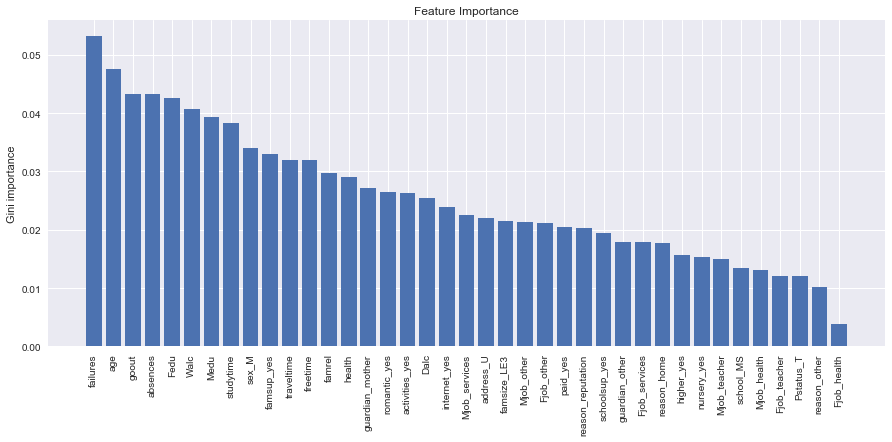

In [55]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())


dict_features = {}
for i in range(len(model.feature_importances_)):
    dict_features.update({df.drop(['G3'], axis = 1).columns[i]:100*model.feature_importances_[i]})
indices = np.argsort(model.feature_importances_)[::-1]


plt.bar(range(df.drop(['G3'], axis = 1).shape[1]),model.feature_importances_[indices], align='center')
plt.xticks(range(df.drop(['G3'], axis = 1).shape[1]), df.drop(['G3'], axis = 1).columns[indices], rotation='vertical')
plt.title("Feature Importance")
plt.ylabel("Gini importance")

#### Selecting top 10 attributes

In [69]:
top_10_attributes = []
count = 1
for i in indices:
    if count < 11:
        top_10_attributes.append(df.drop(['G3'], axis = 1).columns[i])
        count+=1
    else:
        break

In [70]:
top_10_attributes

['failures',
 'age',
 'goout',
 'absences',
 'Fedu',
 'Walc',
 'Medu',
 'studytime',
 'sex_M',
 'famsup_yes']

### Running K-means after Feature Selection

In [71]:
kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(df[top_10_attributes])

predictions = kmeans.predict(df[top_10_attributes])

confusion_matrix(df['G3'],predictions)

acc= round(100*accuracy_score(df['G3'],predictions),2)

if acc < 50:
    predictions = np.where(predictions == 0, 1,0)
    
acc= round(100*accuracy_score(df['G3'],predictions),2)

print("Accuracy =", acc,"%")

Accuracy = 53.92 %


### Feature Transformation¶
### --- PCA
#### For Visualizing Clusters, taking PCA = 2


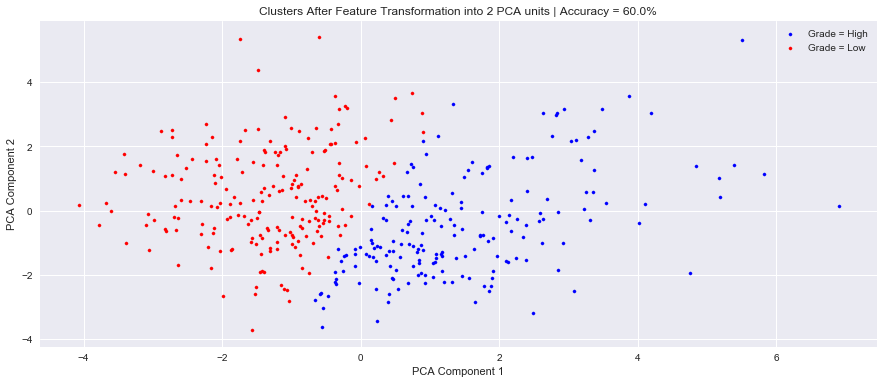

In [72]:
from sklearn.decomposition import PCA


kmeans = KMeans(n_clusters=2,random_state=0)


pca = PCA(n_components=2)

X = pca.fit_transform(X)

kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

acc= round(100*accuracy_score(df['G3'],y_kmeans),2)

if acc < 50:
    y_kmeans = np.where(y_kmeans == 0, 1,0)
    
acc= round(100*accuracy_score(df['G3'],y_kmeans),2)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'blue', label = 'Grade = High')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'red', label = 'Grade = Low')
plt.title("Clusters After Feature Transformation into 2 PCA units | Accuracy = {}%".format(acc))
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

### Principal Components Vs Explained Variance

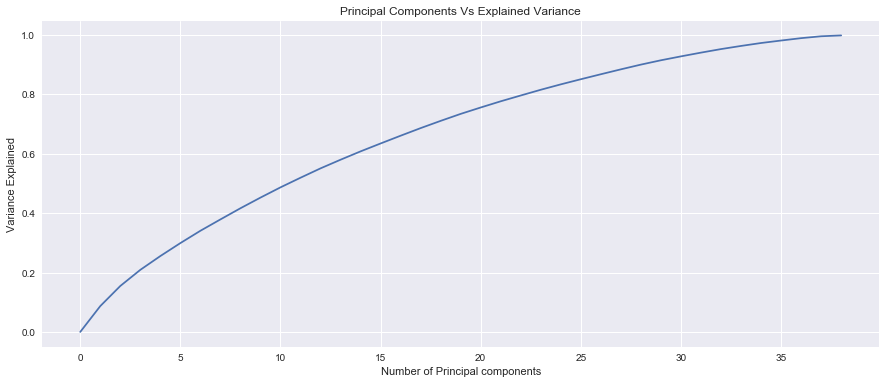

In [77]:
#PCA
var = []
for i in range(39):
    X = df.drop(['G3'], axis = 1)

    # Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X)

    pca = PCA(n_components=i)
    X_train = pca.fit_transform(X_train)
    ex_var  = pca.explained_variance_ratio_
    var.append(np.sum(ex_var))
plt.plot(var)
plt.xlabel("Number of Principal components")
plt.ylabel("Variance Explained")
plt.title("Principal Components Vs Explained Variance")

#### So we will choose 22 principal components, as percentage of variance explained ~ 0.8

(1, 25)

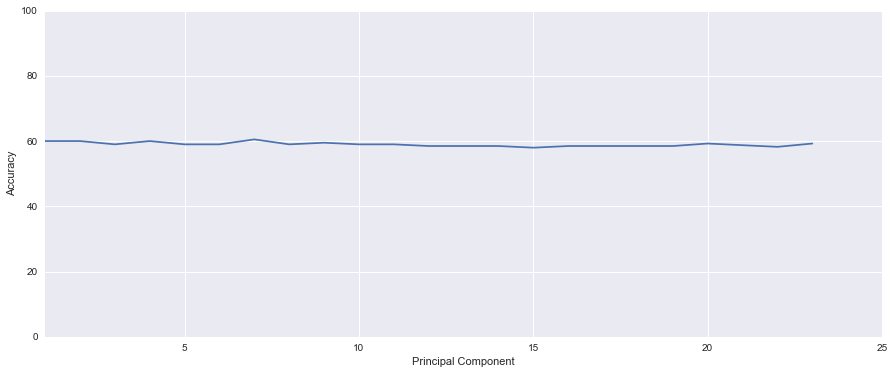

In [83]:
acc = []
for i in range(1,25):
    
    X = df.drop(['G3'], axis = 1)

    # Scaling

    X_train = sc.fit_transform(X)

    pca = PCA(n_components=i)
    
    X_train = pca.fit_transform(X_train)

    kmeans.fit(X_train)

    predictions = kmeans.predict(X_train)
    acc1= round(100*accuracy_score(df['G3'],predictions),2)

    if acc1 < 50:
        predictions = np.where(predictions == 0, 1,0)
    
    acc1= round(100*accuracy_score(df['G3'],predictions),2)

    acc.append(acc1)
plt.plot(acc)
plt.ylabel("Accuracy")
plt.title("")
plt.ylim(0,100)
plt.xlabel("Principal Component")
plt.xlim(1,25)

### Running K means 10 times, But Accuracy is almost similar , Max ~ 61 % on PCA = 7 and on PCA = 1 its 60%

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

kmeans = KMeans(n_clusters=2,random_state=0)
from sklearn.decomposition import FastICA


#### As observed, ICA didn’t result in different K-Means clusters for given number of components,
#### Hence, experimenting with Number of ICA components to find max accuracy at n_components = 2, Acc = 60.25%

In [95]:
acc = []
for i in range(1,39):
    
    X = df.drop(['G3'], axis = 1)


    # Scaling

    X_train = sc.fit_transform(X)


    ica = FastICA(n_components=i,max_iter=1000, tol=0.1)
    X_train = ica.fit_transform(X_train)
    #X_train = ica.fit_transform(X_train)

    kmeans.fit(X_train)

    predictions = kmeans.predict(X_train)
    
    acc1= round(100*accuracy_score(df['G3'],predictions),2)

    if acc1 < 50:
        predictions = np.where(predictions == 0, 1,0)
    
    acc1= round(100*accuracy_score(df['G3'],predictions),2)


    acc.append(acc1)


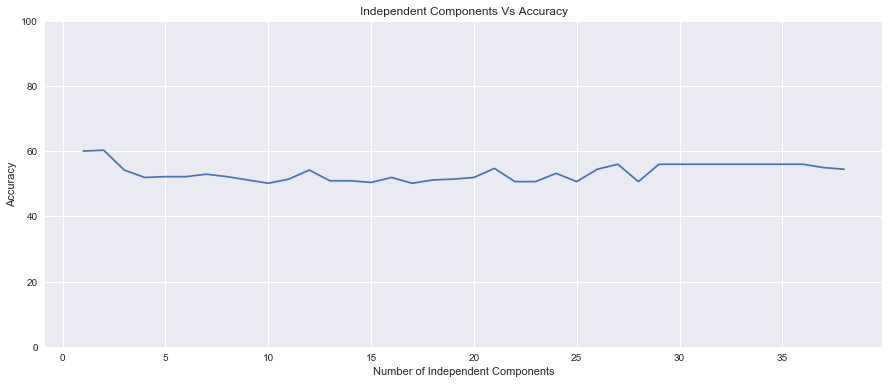

In [96]:
plt.plot(range(1,39),acc)
plt.ylabel("Accuracy")
plt.title("")
plt.ylim(0,100)
plt.xlabel("Number of Independent Components")
plt.title("Independent Components Vs Accuracy")

### -- Random Projection
### It is showing max Acc = 58.99% at 14 Random Projections

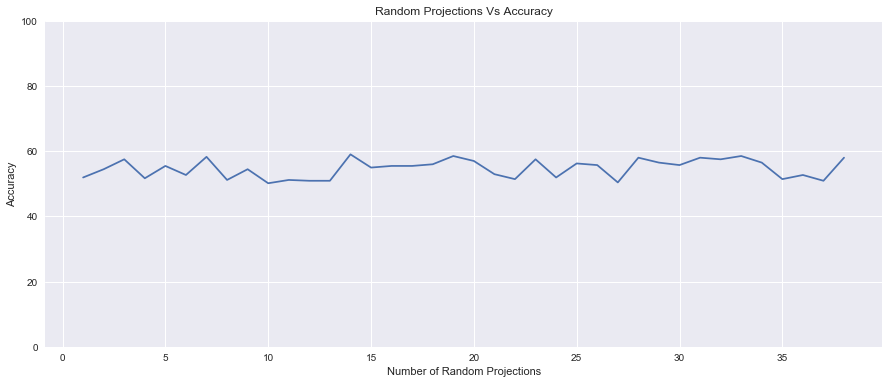

In [99]:
from sklearn import random_projection
acc = []
for i in range(1,39):

    X = df.drop(['G3'], axis = 1)
    # Scaling

    X_train = sc.fit_transform(X)


    transformer = random_projection.SparseRandomProjection(n_components=i)
    X_train = transformer.fit_transform(X_train)
    #X_train = ica.fit_transform(X_train)

    kmeans.fit(X_train)

    predictions = kmeans.predict(X_train)
    
    acc1= round(100*accuracy_score(df['G3'],predictions),2)
    
    if acc1 < 50:
        predictions = np.where(predictions == 0, 1,0)
    
    acc1= round(100*accuracy_score(df['G3'],predictions),2)


    acc.append(acc1)

plt.plot(range(1,39),acc)
plt.ylabel("Accuracy")
plt.title("")
plt.ylim(0,100)
plt.xlabel("Number of Random Projections")
plt.title("Random Projections Vs Accuracy")

In [126]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3,random_state=23)
X_train=train.drop(['G3'], axis = 1)
y_train=train['G3']
X_test=test.drop(['G3'],axis = 1)
y_test=test['G3']


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_val = X_sca.fit_transform(X_val)
X_test = X_sca.transform(X_test)

pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_val = pca.fit_transform(X_val)
X_test = pca.fit_transform(X_test)


In [127]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu', input_dim = 20))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=15, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=15, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
193/193 [==============================] - 3s 14ms/step - loss: 0.6930 - acc: 0.5337
Epoch 2/20
193/193 [==============================] - 0s 415us/step - loss: 0.6919 - acc: 0.6943
Epoch 3/20
193/193 [==============================] - 0s 429us/step - loss: 0.6885 - acc: 0.6943
Epoch 4/20
193/193 [==============================] - 0s 368us/step - loss: 0.6807 - acc: 0.7824
Epoch 5/20
193/193 [==============================] - 0s 355us/step - loss: 0.6643 - acc: 0.8083
Epoch 6/20
193/193 [==============================] - 0s 360us/step - loss: 0.6330 - acc: 0.8290
Epoch 7/20
193/193 [==============================] - 0s 356us/step - loss: 0.5870 - acc: 0.8342
Epoch 8/20
193/193 [==============================] - 0s 388us/step - loss: 0.5345 - acc: 0.8290
Epoch 9/20
193/193 [==============================] - 0s 418us/step - loss: 0.4877 - acc: 0.8446
Epoch 10/20
193/193 [==============================] - 0s 481us/step - loss: 0.4492 - acc: 0.8601
Epoch 11/20
193/193 [=========

In [128]:
from sklearn.metrics import confusion_matrix


def accuracy_NN(classifier,X,y):
    # Predicting the Test set results
    y_pred = classifier.predict(X)
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y.values, y_pred)
    return (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [129]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))

Train accuracy = 90.16%
Test accuracy = 55.46%


In [130]:
accuracy_validation = [None]*10
for NoOfHiddenLayers in range(0,10):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu', input_dim = 20))
    i=0
    # N Number of Hidden Layers
    while(i < NoOfHiddenLayers):
        classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu'))
        i+=1
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)
    accuracy_validation[NoOfHiddenLayers]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=15, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
193/193 [==============================] - 3s 14ms/step - loss: 0.6929 - acc: 0.5181
Epoch 2/20
193/193 [==============================] - 0s 409us/step - loss: 0.6905 - acc: 0.6580
Epoch 3/20
193/193 [==============================] - 0s 286us/step - loss: 0.6867 - acc: 0.7254
Epoch 4/20
193/193 [==============================] - 0s 365us/step - loss: 0.6793 - acc: 0.7772
Epoch 5/20
193/193 [==============================] - 0s 455us/step - loss: 0.6674 - acc: 0.7979
Epoch 6/20
193/193 [==============================] - 0s 434us/step - loss: 0.6501 - acc: 0.8031
Epoch 7/20
193/193 [==============================] - 0s 353us/step - loss: 0.6277 - acc: 0.7979
Epoch 8/20
193/193 [==============================] - 0s 482us/step - loss: 0.6017 - acc: 0.8135
Epoch 9/20
193/193 [==============================] - 0s 431us/step - loss: 0.5764 - acc: 0.7979
Epoch 10/20
193/193 [==============================] - 0s 371us/step - loss: 0.5524 - acc: 0.8031
Epoch 11/20
193/193 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=15, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
193/193 [==============================] - 2s 13ms/step - loss: 0.6930 - acc: 0.5130
Epoch 2/20
193/193 [==============================] - 0s 493us/step - loss: 0.6920 - acc: 0.5130
Epoch 3/20
193/193 [==============================] - 0s 402us/step - loss: 0.6892 - acc: 0.5440
Epoch 4/20
193/193 [==============================] - 0s 427us/step - loss: 0.6819 - acc: 0.6321
Epoch 5/20
193/193 [==============================] - 0s 464us/step - loss: 0.6668 - acc: 0.6891
Epoch 6/20
193/193 [==============================] - 0s 416us/step - loss: 0.6426 - acc: 0.7617
Epoch 7/20
193/193 [==============================] - 0s 402us/step - loss: 0.6082 - acc: 0.7876
Epoch 8/20
193/193 [==============================] - 0s 360us/step - loss: 0.5723 - acc: 0.7979
Epoch 9/20
193/193 [==============================] - 0s 442us/step - loss: 0.5395 - acc: 0.8031
Epoch 10/20
193/193 [==============================] - 0s 447us/step - loss: 0.5100 - acc: 0.8238
Epoch 11/20
193/193 [=========

193/193 [==============================] - 0s 319us/step - loss: 0.6931 - acc: 0.5130
Epoch 5/20
193/193 [==============================] - 0s 257us/step - loss: 0.6931 - acc: 0.5130
Epoch 6/20
193/193 [==============================] - 0s 418us/step - loss: 0.6930 - acc: 0.5130
Epoch 7/20
193/193 [==============================] - 0s 252us/step - loss: 0.6930 - acc: 0.5130
Epoch 8/20
193/193 [==============================] - 0s 381us/step - loss: 0.6930 - acc: 0.5130
Epoch 9/20
193/193 [==============================] - 0s 247us/step - loss: 0.6930 - acc: 0.5130
Epoch 10/20
193/193 [==============================] - 0s 307us/step - loss: 0.6929 - acc: 0.5130
Epoch 11/20
193/193 [==============================] - 0s 374us/step - loss: 0.6929 - acc: 0.5130
Epoch 12/20
193/193 [==============================] - 0s 257us/step - loss: 0.6930 - acc: 0.5130
Epoch 13/20
193/193 [==============================] - 0s 378us/step - loss: 0.6930 - acc: 0.5130
Epoch 14/20
193/193 [================

193/193 [==============================] - 0s 459us/step - loss: 0.6930 - acc: 0.5130
Epoch 9/20
193/193 [==============================] - 0s 424us/step - loss: 0.6931 - acc: 0.5130
Epoch 10/20
193/193 [==============================] - 0s 399us/step - loss: 0.6930 - acc: 0.5130
Epoch 11/20
193/193 [==============================] - 0s 414us/step - loss: 0.6930 - acc: 0.5130
Epoch 12/20
193/193 [==============================] - 0s 462us/step - loss: 0.6930 - acc: 0.5130
Epoch 13/20
193/193 [==============================] - 0s 369us/step - loss: 0.6930 - acc: 0.5130
Epoch 14/20
193/193 [==============================] - 0s 372us/step - loss: 0.6930 - acc: 0.5130
Epoch 15/20
193/193 [==============================] - 0s 383us/step - loss: 0.6930 - acc: 0.5130
Epoch 16/20
193/193 [==============================] - 0s 372us/step - loss: 0.6930 - acc: 0.5130
Epoch 17/20
193/193 [==============================] - 0s 367us/step - loss: 0.6930 - acc: 0.5130
Epoch 18/20
193/193 [============

In [131]:
accuracy_validation

[53.01, 53.01, 61.45, 56.63, 51.81, 48.19, 48.19, 48.19, 48.19, 48.19]

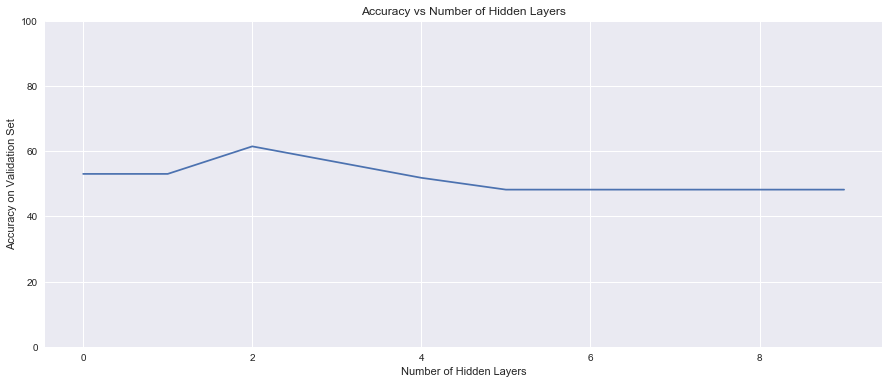

In [132]:
plt.ylim([0,100])
plt.plot(accuracy_validation)
plt.title("Accuracy vs Number of Hidden Layers")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

**As we see, Number of Hidden layers decrease accuracy on adding 3nd layer we will keep only 2 hidden layer in the NN**
### Experiment 2
#### No of Nodes in Hidden Layer

In [163]:
accuracy_validation = [None]*10
count = 0
for NoOfNodes in range(5,15):
    
    classifier = Sequential()
    # First Layer + Hidden Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu', input_dim = 2))
    
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu', input_dim = 1))
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu', input_dim = NoOfNodes))
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=1, kernel_initializer="uniform")`
  import sys
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1, units=5, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=5, units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py

Epoch 1/20
193/193 [==============================] - 8s 42ms/step - loss: 0.6932 - acc: 0.5233
Epoch 2/20
193/193 [==============================] - 0s 895us/step - loss: 0.6931 - acc: 0.5130
Epoch 3/20
193/193 [==============================] - 0s 662us/step - loss: 0.6931 - acc: 0.5130
Epoch 4/20
193/193 [==============================] - 0s 605us/step - loss: 0.6931 - acc: 0.5130
Epoch 5/20
193/193 [==============================] - 0s 587us/step - loss: 0.6931 - acc: 0.5130
Epoch 6/20
193/193 [==============================] - 0s 672us/step - loss: 0.6931 - acc: 0.5130
Epoch 7/20
193/193 [==============================] - 0s 668us/step - loss: 0.6931 - acc: 0.5130
Epoch 8/20
193/193 [==============================] - 0s 766us/step - loss: 0.6931 - acc: 0.5130
Epoch 9/20
193/193 [==============================] - 0s 651us/step - loss: 0.6931 - acc: 0.5130
Epoch 10/20
193/193 [==============================] - 0s 675us/step - loss: 0.6931 - acc: 0.5130
Epoch 11/20
193/193 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=6, units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
193/193 [==============================] - 8s 40ms/step - loss: 0.6932 - acc: 0.5130
Epoch 2/20
193/193 [==============================] - 0s 702us/step - loss: 0.6931 - acc: 0.5130
Epoch 3/20
193/193 [==============================] - 0s 688us/step - loss: 0.6931 - acc: 0.5130
Epoch 4/20
193/193 [==============================] - 0s 646us/step - loss: 0.6931 - acc: 0.5130
Epoch 5/20
193/193 [==============================] - 0s 708us/step - loss: 0.6930 - acc: 0.5130
Epoch 6/20
193/193 [==============================] - 0s 615us/step - loss: 0.6930 - acc: 0.5130
Epoch 7/20
193/193 [==============================] - 0s 764us/step - loss: 0.6930 - acc: 0.5130
Epoch 8/20
193/193 [==============================] - 0s 764us/step - loss: 0.6929 - acc: 0.5130
Epoch 9/20
193/193 [==============================] - 0s 746us/step - loss: 0.6929 - acc: 0.5130
Epoch 10/20
193/193 [==============================] - 0s 693us/step - loss: 0.6929 - acc: 0.5130
Epoch 11/20
193/193 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1, units=7, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=7, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
193/193 [==============================] - 8s 42ms/step - loss: 0.6932 - acc: 0.4611
Epoch 2/20
193/193 [==============================] - 0s 577us/step - loss: 0.6932 - acc: 0.5130
Epoch 3/20
193/193 [==============================] - 0s 489us/step - loss: 0.6931 - acc: 0.5130
Epoch 4/20
193/193 [==============================] - 0s 604us/step - loss: 0.6931 - acc: 0.5130
Epoch 5/20
193/193 [==============================] - 0s 537us/step - loss: 0.6931 - acc: 0.5130
Epoch 6/20
193/193 [==============================] - 0s 511us/step - loss: 0.6930 - acc: 0.5130
Epoch 7/20
193/193 [==============================] - 0s 527us/step - loss: 0.6930 - acc: 0.5130
Epoch 8/20
193/193 [==============================] - 0s 611us/step - loss: 0.6930 - acc: 0.5130
Epoch 9/20
193/193 [==============================] - 0s 468us/step - loss: 0.6930 - acc: 0.5130
Epoch 10/20
193/193 [==============================] - 0s 554us/step - loss: 0.6930 - acc: 0.5130
Epoch 11/20
193/193 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1, units=8, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=8, units=8, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
193/193 [==============================] - 8s 44ms/step - loss: 0.6932 - acc: 0.5078
Epoch 2/20
193/193 [==============================] - 0s 488us/step - loss: 0.6931 - acc: 0.5130
Epoch 3/20
193/193 [==============================] - 0s 560us/step - loss: 0.6931 - acc: 0.5130
Epoch 4/20
193/193 [==============================] - 0s 529us/step - loss: 0.6932 - acc: 0.5130
Epoch 5/20
193/193 [==============================] - 0s 456us/step - loss: 0.6931 - acc: 0.5130
Epoch 6/20
193/193 [==============================] - 0s 546us/step - loss: 0.6931 - acc: 0.5130
Epoch 7/20
193/193 [==============================] - 0s 582us/step - loss: 0.6931 - acc: 0.5130
Epoch 8/20
193/193 [==============================] - 0s 582us/step - loss: 0.6931 - acc: 0.5130
Epoch 9/20
193/193 [==============================] - 0s 527us/step - loss: 0.6930 - acc: 0.5130
Epoch 10/20
193/193 [==============================] - 0s 518us/step - loss: 0.6930 - acc: 0.5130
Epoch 11/20
193/193 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1, units=9, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=9, units=9, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
193/193 [==============================] - 7s 37ms/step - loss: 0.6932 - acc: 0.4611
Epoch 2/20
193/193 [==============================] - 0s 548us/step - loss: 0.6932 - acc: 0.5130
Epoch 3/20
193/193 [==============================] - 0s 513us/step - loss: 0.6931 - acc: 0.5130
Epoch 4/20
193/193 [==============================] - 0s 628us/step - loss: 0.6932 - acc: 0.5130
Epoch 5/20
193/193 [==============================] - 0s 511us/step - loss: 0.6931 - acc: 0.5130
Epoch 6/20
193/193 [==============================] - 0s 563us/step - loss: 0.6931 - acc: 0.5130
Epoch 7/20
193/193 [==============================] - 0s 536us/step - loss: 0.6932 - acc: 0.5130
Epoch 8/20
193/193 [==============================] - 0s 546us/step - loss: 0.6930 - acc: 0.5130
Epoch 9/20
193/193 [==============================] - 0s 531us/step - loss: 0.6930 - acc: 0.5130
Epoch 10/20
193/193 [==============================] - 0s 553us/step - loss: 0.6930 - acc: 0.5130
Epoch 11/20
193/193 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1, units=10, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=10, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
193/193 [==============================] - 7s 36ms/step - loss: 0.6932 - acc: 0.5130
Epoch 2/20
193/193 [==============================] - 0s 464us/step - loss: 0.6931 - acc: 0.5130
Epoch 3/20
193/193 [==============================] - 0s 495us/step - loss: 0.6931 - acc: 0.5130
Epoch 4/20
193/193 [==============================] - 0s 622us/step - loss: 0.6931 - acc: 0.5130
Epoch 5/20
193/193 [==============================] - 0s 461us/step - loss: 0.6931 - acc: 0.5130
Epoch 6/20
193/193 [==============================] - 0s 518us/step - loss: 0.6930 - acc: 0.5130
Epoch 7/20
193/193 [==============================] - 0s 637us/step - loss: 0.6930 - acc: 0.5130
Epoch 8/20
193/193 [==============================] - 0s 521us/step - loss: 0.6931 - acc: 0.5130
Epoch 9/20
193/193 [==============================] - 0s 549us/step - loss: 0.6930 - acc: 0.5130
Epoch 10/20
193/193 [==============================] - 0s 548us/step - loss: 0.6929 - acc: 0.5130
Epoch 11/20
193/193 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1, units=11, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=11, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
193/193 [==============================] - 7s 36ms/step - loss: 0.6932 - acc: 0.4508
Epoch 2/20
193/193 [==============================] - 0s 788us/step - loss: 0.6932 - acc: 0.5130
Epoch 3/20
193/193 [==============================] - 0s 761us/step - loss: 0.6931 - acc: 0.5130
Epoch 4/20
193/193 [==============================] - 0s 738us/step - loss: 0.6931 - acc: 0.5130
Epoch 5/20
193/193 [==============================] - 0s 725us/step - loss: 0.6931 - acc: 0.5130
Epoch 6/20
193/193 [==============================] - 0s 578us/step - loss: 0.6931 - acc: 0.5130
Epoch 7/20
193/193 [==============================] - 0s 560us/step - loss: 0.6931 - acc: 0.5130
Epoch 8/20
193/193 [==============================] - 0s 517us/step - loss: 0.6931 - acc: 0.5130
Epoch 9/20
193/193 [==============================] - 0s 496us/step - loss: 0.6931 - acc: 0.5130
Epoch 10/20
193/193 [==============================] - 0s 542us/step - loss: 0.6931 - acc: 0.5130
Epoch 11/20
193/193 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1, units=12, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=12, units=12, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
193/193 [==============================] - 7s 37ms/step - loss: 0.6932 - acc: 0.4611
Epoch 2/20
193/193 [==============================] - 0s 539us/step - loss: 0.6931 - acc: 0.5130
Epoch 3/20
193/193 [==============================] - 0s 550us/step - loss: 0.6932 - acc: 0.5130
Epoch 4/20
193/193 [==============================] - 0s 571us/step - loss: 0.6932 - acc: 0.5130
Epoch 5/20
193/193 [==============================] - 0s 532us/step - loss: 0.6931 - acc: 0.5130
Epoch 6/20
193/193 [==============================] - 0s 518us/step - loss: 0.6931 - acc: 0.5130
Epoch 7/20
193/193 [==============================] - 0s 487us/step - loss: 0.6931 - acc: 0.5130
Epoch 8/20
193/193 [==============================] - 0s 673us/step - loss: 0.6931 - acc: 0.5130
Epoch 9/20
193/193 [==============================] - 0s 480us/step - loss: 0.6931 - acc: 0.5130
Epoch 10/20
193/193 [==============================] - 0s 516us/step - loss: 0.6930 - acc: 0.5130
Epoch 11/20
193/193 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1, units=13, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=13, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
193/193 [==============================] - 7s 37ms/step - loss: 0.6932 - acc: 0.4611
Epoch 2/20
193/193 [==============================] - 0s 577us/step - loss: 0.6931 - acc: 0.5130
Epoch 3/20
193/193 [==============================] - 0s 586us/step - loss: 0.6931 - acc: 0.5130
Epoch 4/20
193/193 [==============================] - 0s 518us/step - loss: 0.6930 - acc: 0.5130
Epoch 5/20
193/193 [==============================] - 0s 519us/step - loss: 0.6931 - acc: 0.5130
Epoch 6/20
193/193 [==============================] - 0s 467us/step - loss: 0.6929 - acc: 0.5130
Epoch 7/20
193/193 [==============================] - 0s 591us/step - loss: 0.6929 - acc: 0.5130
Epoch 8/20
193/193 [==============================] - 0s 520us/step - loss: 0.6927 - acc: 0.5130
Epoch 9/20
193/193 [==============================] - 0s 577us/step - loss: 0.6924 - acc: 0.5130
Epoch 10/20
193/193 [==============================] - 0s 588us/step - loss: 0.6919 - acc: 0.5130
Epoch 11/20
193/193 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1, units=14, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=14, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
193/193 [==============================] - 7s 37ms/step - loss: 0.6932 - acc: 0.5026
Epoch 2/20
193/193 [==============================] - 0s 626us/step - loss: 0.6932 - acc: 0.5130
Epoch 3/20
193/193 [==============================] - 0s 489us/step - loss: 0.6931 - acc: 0.5130
Epoch 4/20
193/193 [==============================] - 0s 575us/step - loss: 0.6931 - acc: 0.5130
Epoch 5/20
193/193 [==============================] - 0s 595us/step - loss: 0.6931 - acc: 0.5130
Epoch 6/20
193/193 [==============================] - 0s 522us/step - loss: 0.6930 - acc: 0.5130
Epoch 7/20
193/193 [==============================] - 0s 571us/step - loss: 0.6931 - acc: 0.5130
Epoch 8/20
193/193 [==============================] - 0s 592us/step - loss: 0.6928 - acc: 0.5130
Epoch 9/20
193/193 [==============================] - 0s 519us/step - loss: 0.6926 - acc: 0.5130
Epoch 10/20
193/193 [==============================] - 0s 679us/step - loss: 0.6921 - acc: 0.5130
Epoch 11/20
193/193 [=========

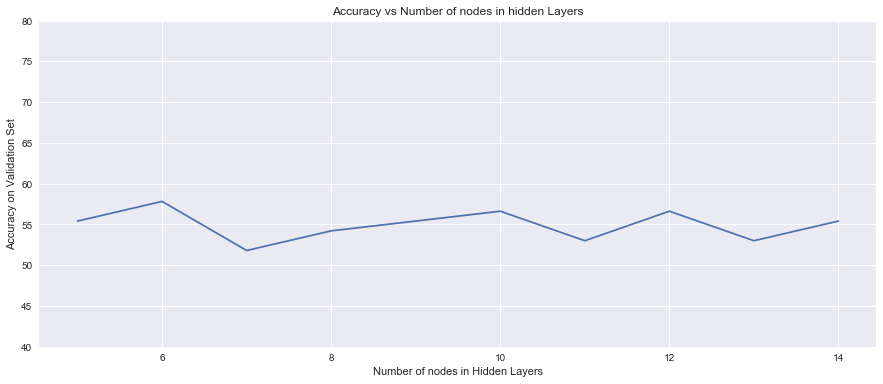

In [134]:
plt.ylim([40,80])
plt.plot(range(5,15),accuracy_validation)
plt.title("Accuracy vs Number of nodes in hidden Layers")
plt.xlabel("Number of nodes in Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

In [137]:
accuracy_validation = [None]*40
count = 0
for batchSize in range(5,45):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu', input_dim = 20))
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 15))
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 6))
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = batchSize, nb_epoch = 50)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=15, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=15, units=6, kernel_initializer="uniform")`
  import sys
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=6, units=6, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in

Epoch 1/50
193/193 [==============================] - 4s 20ms/step - loss: 0.6932 - acc: 0.5026
Epoch 2/50
193/193 [==============================] - 0s 1ms/step - loss: 0.6931 - acc: 0.5130
Epoch 3/50
193/193 [==============================] - 0s 1ms/step - loss: 0.6926 - acc: 0.5130
Epoch 4/50
193/193 [==============================] - 0s 1ms/step - loss: 0.6890 - acc: 0.5130
Epoch 5/50
193/193 [==============================] - 0s 1ms/step - loss: 0.6733 - acc: 0.5130
Epoch 6/50
193/193 [==============================] - 0s 1ms/step - loss: 0.6336 - acc: 0.5130
Epoch 7/50
193/193 [==============================] - 0s 971us/step - loss: 0.5866 - acc: 0.6943
Epoch 8/50
193/193 [==============================] - 0s 837us/step - loss: 0.5602 - acc: 0.7876
Epoch 9/50
193/193 [==============================] - 0s 801us/step - loss: 0.5439 - acc: 0.8238
Epoch 10/50
193/193 [==============================] - 0s 806us/step - loss: 0.5301 - acc: 0.8342
Epoch 11/50
193/193 [===================

193/193 [==============================] - 0s 667us/step - loss: 0.1534 - acc: 0.9637
Epoch 36/50
193/193 [==============================] - 0s 589us/step - loss: 0.1428 - acc: 0.9689
Epoch 37/50
193/193 [==============================] - 0s 605us/step - loss: 0.1404 - acc: 0.9689
Epoch 38/50
193/193 [==============================] - 0s 553us/step - loss: 0.1320 - acc: 0.9689
Epoch 39/50
193/193 [==============================] - 0s 563us/step - loss: 0.1282 - acc: 0.9689
Epoch 40/50
193/193 [==============================] - 0s 553us/step - loss: 0.1252 - acc: 0.9689
Epoch 41/50
193/193 [==============================] - 0s 563us/step - loss: 0.1201 - acc: 0.9689
Epoch 42/50
193/193 [==============================] - 0s 594us/step - loss: 0.1168 - acc: 0.9741
Epoch 43/50
193/193 [==============================] - 0s 641us/step - loss: 0.1113 - acc: 0.9741
Epoch 44/50
193/193 [==============================] - 0s 646us/step - loss: 0.1104 - acc: 0.9741
Epoch 45/50
193/193 [===========

193/193 [==============================] - 0s 713us/step - loss: 0.4767 - acc: 0.9016
Epoch 19/50
193/193 [==============================] - 0s 723us/step - loss: 0.4684 - acc: 0.9067
Epoch 20/50
193/193 [==============================] - 0s 765us/step - loss: 0.4593 - acc: 0.9119
Epoch 21/50
193/193 [==============================] - 0s 625us/step - loss: 0.4521 - acc: 0.9067
Epoch 22/50
193/193 [==============================] - 0s 920us/step - loss: 0.4415 - acc: 0.9119
Epoch 23/50
193/193 [==============================] - 0s 1ms/step - loss: 0.4328 - acc: 0.9067
Epoch 24/50
193/193 [==============================] - 0s 971us/step - loss: 0.4276 - acc: 0.9223
Epoch 25/50
193/193 [==============================] - 0s 915us/step - loss: 0.4161 - acc: 0.9223
Epoch 26/50
193/193 [==============================] - 0s 1ms/step - loss: 0.4060 - acc: 0.9223
Epoch 27/50
193/193 [==============================] - 0s 884us/step - loss: 0.3959 - acc: 0.9223
Epoch 28/50
193/193 [===============

193/193 [==============================] - 5s 26ms/step - loss: 0.6932 - acc: 0.4456
Epoch 2/50
193/193 [==============================] - 0s 413us/step - loss: 0.6932 - acc: 0.4663
Epoch 3/50
193/193 [==============================] - 0s 413us/step - loss: 0.6931 - acc: 0.5337
Epoch 4/50
193/193 [==============================] - 0s 419us/step - loss: 0.6929 - acc: 0.5130
Epoch 5/50
193/193 [==============================] - 0s 429us/step - loss: 0.6923 - acc: 0.5959
Epoch 6/50
193/193 [==============================] - 0s 444us/step - loss: 0.6894 - acc: 0.7876
Epoch 7/50
193/193 [==============================] - 0s 444us/step - loss: 0.6797 - acc: 0.7668
Epoch 8/50
193/193 [==============================] - 0s 419us/step - loss: 0.6616 - acc: 0.7150
Epoch 9/50
193/193 [==============================] - 0s 434us/step - loss: 0.6313 - acc: 0.7668
Epoch 10/50
193/193 [==============================] - 0s 553us/step - loss: 0.6008 - acc: 0.7668
Epoch 11/50
193/193 [====================

193/193 [==============================] - 0s 470us/step - loss: 0.2448 - acc: 0.9171
Epoch 35/50
193/193 [==============================] - 0s 584us/step - loss: 0.2374 - acc: 0.9223
Epoch 36/50
193/193 [==============================] - 0s 501us/step - loss: 0.2318 - acc: 0.9223
Epoch 37/50
193/193 [==============================] - 0s 460us/step - loss: 0.2234 - acc: 0.9378
Epoch 38/50
193/193 [==============================] - 0s 434us/step - loss: 0.2177 - acc: 0.9378
Epoch 39/50
193/193 [==============================] - 0s 439us/step - loss: 0.2116 - acc: 0.9430
Epoch 40/50
193/193 [==============================] - ETA: 0s - loss: 0.2432 - acc: 0.931 - 0s 444us/step - loss: 0.2038 - acc: 0.9482
Epoch 41/50
193/193 [==============================] - 0s 470us/step - loss: 0.1991 - acc: 0.9534
Epoch 42/50
193/193 [==============================] - 0s 517us/step - loss: 0.1940 - acc: 0.9482
Epoch 43/50
193/193 [==============================] - 0s 439us/step - loss: 0.1885 - acc: 0

193/193 [==============================] - 0s 351us/step - loss: 0.6930 - acc: 0.5130
Epoch 18/50
193/193 [==============================] - 0s 382us/step - loss: 0.6930 - acc: 0.5130
Epoch 19/50
193/193 [==============================] - 0s 341us/step - loss: 0.6930 - acc: 0.5130
Epoch 20/50
193/193 [==============================] - 0s 341us/step - loss: 0.6930 - acc: 0.5130
Epoch 21/50
193/193 [==============================] - 0s 331us/step - loss: 0.6930 - acc: 0.5130
Epoch 22/50
193/193 [==============================] - 0s 300us/step - loss: 0.6929 - acc: 0.5130
Epoch 23/50
193/193 [==============================] - 0s 357us/step - loss: 0.6929 - acc: 0.5130
Epoch 24/50
193/193 [==============================] - 0s 351us/step - loss: 0.6929 - acc: 0.5130
Epoch 25/50
193/193 [==============================] - 0s 341us/step - loss: 0.6929 - acc: 0.5130
Epoch 26/50
193/193 [==============================] - 0s 351us/step - loss: 0.6929 - acc: 0.5130
Epoch 27/50
193/193 [===========

193/193 [==============================] - 0s 310us/step - loss: 0.2076 - acc: 0.9482
Epoch 1/50
193/193 [==============================] - 5s 28ms/step - loss: 0.6932 - acc: 0.4974
Epoch 2/50
193/193 [==============================] - 0s 264us/step - loss: 0.6931 - acc: 0.5130
Epoch 3/50
193/193 [==============================] - 0s 279us/step - loss: 0.6931 - acc: 0.5130
Epoch 4/50
193/193 [==============================] - 0s 258us/step - loss: 0.6931 - acc: 0.5130
Epoch 5/50
193/193 [==============================] - 0s 279us/step - loss: 0.6928 - acc: 0.5130
Epoch 6/50
193/193 [==============================] - 0s 279us/step - loss: 0.6923 - acc: 0.6632
Epoch 7/50
193/193 [==============================] - 0s 305us/step - loss: 0.6909 - acc: 0.7979
Epoch 8/50
193/193 [==============================] - 0s 295us/step - loss: 0.6879 - acc: 0.8031
Epoch 9/50
193/193 [==============================] - 0s 320us/step - loss: 0.6818 - acc: 0.7876
Epoch 10/50
193/193 [=====================

193/193 [==============================] - 0s 351us/step - loss: 0.4879 - acc: 0.8756 0s - loss: 0.4899 - acc: 0.875
Epoch 34/50
193/193 [==============================] - 0s 403us/step - loss: 0.4818 - acc: 0.8756
Epoch 35/50
193/193 [==============================] - 0s 351us/step - loss: 0.4775 - acc: 0.8705
Epoch 36/50
193/193 [==============================] - 0s 346us/step - loss: 0.4723 - acc: 0.8705
Epoch 37/50
193/193 [==============================] - 0s 300us/step - loss: 0.4686 - acc: 0.8756
Epoch 38/50
193/193 [==============================] - 0s 341us/step - loss: 0.4653 - acc: 0.8756
Epoch 39/50
193/193 [==============================] - 0s 315us/step - loss: 0.4601 - acc: 0.8808
Epoch 40/50
193/193 [==============================] - 0s 346us/step - loss: 0.4551 - acc: 0.8808
Epoch 41/50
193/193 [==============================] - 0s 408us/step - loss: 0.4508 - acc: 0.8860
Epoch 42/50
193/193 [==============================] - 0s 346us/step - loss: 0.4463 - acc: 0.8964
E

193/193 [==============================] - 0s 295us/step - loss: 0.5829 - acc: 0.8187
Epoch 17/50
193/193 [==============================] - 0s 284us/step - loss: 0.5527 - acc: 0.8135
Epoch 18/50
193/193 [==============================] - 0s 258us/step - loss: 0.5237 - acc: 0.8083
Epoch 19/50
193/193 [==============================] - 0s 264us/step - loss: 0.4961 - acc: 0.8135
Epoch 20/50
193/193 [==============================] - 0s 269us/step - loss: 0.4728 - acc: 0.8290
Epoch 21/50
193/193 [==============================] - 0s 269us/step - loss: 0.4536 - acc: 0.8394
Epoch 22/50
193/193 [==============================] - 0s 274us/step - loss: 0.4352 - acc: 0.8497
Epoch 23/50
193/193 [==============================] - 0s 258us/step - loss: 0.4203 - acc: 0.8549
Epoch 24/50
193/193 [==============================] - 0s 274us/step - loss: 0.4066 - acc: 0.8601
Epoch 25/50
193/193 [==============================] - 0s 264us/step - loss: 0.3948 - acc: 0.8653
Epoch 26/50
193/193 [===========

193/193 [==============================] - 0s 274us/step - loss: 0.3694 - acc: 0.9430
Epoch 50/50
193/193 [==============================] - 0s 377us/step - loss: 0.3653 - acc: 0.9430
Epoch 1/50
193/193 [==============================] - 4s 20ms/step - loss: 0.6932 - acc: 0.4508
Epoch 2/50
193/193 [==============================] - 0s 171us/step - loss: 0.6931 - acc: 0.5130
Epoch 3/50
193/193 [==============================] - 0s 165us/step - loss: 0.6932 - acc: 0.5130
Epoch 4/50
193/193 [==============================] - 0s 171us/step - loss: 0.6931 - acc: 0.5130
Epoch 5/50
193/193 [==============================] - 0s 165us/step - loss: 0.6930 - acc: 0.5130
Epoch 6/50
193/193 [==============================] - 0s 171us/step - loss: 0.6927 - acc: 0.5130
Epoch 7/50
193/193 [==============================] - 0s 170us/step - loss: 0.6921 - acc: 0.5130
Epoch 8/50
193/193 [==============================] - 0s 181us/step - loss: 0.6908 - acc: 0.5130
Epoch 9/50
193/193 [=====================

193/193 [==============================] - 0s 222us/step - loss: 0.3829 - acc: 0.8808
Epoch 33/50
193/193 [==============================] - 0s 207us/step - loss: 0.3731 - acc: 0.8808
Epoch 34/50
193/193 [==============================] - 0s 207us/step - loss: 0.3658 - acc: 0.8808
Epoch 35/50
193/193 [==============================] - 0s 207us/step - loss: 0.3597 - acc: 0.8808
Epoch 36/50
193/193 [==============================] - 0s 248us/step - loss: 0.3536 - acc: 0.8860
Epoch 37/50
193/193 [==============================] - 0s 212us/step - loss: 0.3470 - acc: 0.8912
Epoch 38/50
193/193 [==============================] - 0s 217us/step - loss: 0.3412 - acc: 0.8964
Epoch 39/50
193/193 [==============================] - 0s 217us/step - loss: 0.3359 - acc: 0.8964
Epoch 40/50
193/193 [==============================] - 0s 207us/step - loss: 0.3310 - acc: 0.9016
Epoch 41/50
193/193 [==============================] - 0s 196us/step - loss: 0.3260 - acc: 0.9016
Epoch 42/50
193/193 [===========

193/193 [==============================] - 0s 202us/step - loss: 0.6878 - acc: 0.5130
Epoch 16/50
193/193 [==============================] - ETA: 0s - loss: 0.6857 - acc: 0.565 - 0s 191us/step - loss: 0.6834 - acc: 0.5130
Epoch 17/50
193/193 [==============================] - 0s 186us/step - loss: 0.6769 - acc: 0.5959
Epoch 18/50
193/193 [==============================] - 0s 217us/step - loss: 0.6672 - acc: 0.7824
Epoch 19/50
193/193 [==============================] - 0s 212us/step - loss: 0.6554 - acc: 0.7979
Epoch 20/50
193/193 [==============================] - 0s 227us/step - loss: 0.6399 - acc: 0.8083
Epoch 21/50
193/193 [==============================] - 0s 207us/step - loss: 0.6228 - acc: 0.8187
Epoch 22/50
193/193 [==============================] - 0s 207us/step - loss: 0.6026 - acc: 0.8342
Epoch 23/50
193/193 [==============================] - 0s 186us/step - loss: 0.5813 - acc: 0.8342
Epoch 24/50
193/193 [==============================] - 0s 191us/step - loss: 0.5611 - acc: 0

193/193 [==============================] - 0s 207us/step - loss: 0.4687 - acc: 0.8808
Epoch 48/50
193/193 [==============================] - 0s 196us/step - loss: 0.4651 - acc: 0.8808
Epoch 49/50
193/193 [==============================] - 0s 222us/step - loss: 0.4602 - acc: 0.8808
Epoch 50/50
193/193 [==============================] - 0s 202us/step - loss: 0.4565 - acc: 0.8808
Epoch 1/50
193/193 [==============================] - 4s 21ms/step - loss: 0.6932 - acc: 0.4767
Epoch 2/50
193/193 [==============================] - 0s 243us/step - loss: 0.6931 - acc: 0.4974
Epoch 3/50
193/193 [==============================] - 0s 238us/step - loss: 0.6931 - acc: 0.5130
Epoch 4/50
193/193 [==============================] - 0s 243us/step - loss: 0.6931 - acc: 0.5130
Epoch 5/50
193/193 [==============================] - 0s 248us/step - loss: 0.6930 - acc: 0.5130
Epoch 6/50
193/193 [==============================] - 0s 221us/step - loss: 0.6928 - acc: 0.5130
Epoch 7/50
193/193 [===================

193/193 [==============================] - 0s 181us/step - loss: 0.5121 - acc: 0.8446
Epoch 31/50
193/193 [==============================] - 0s 171us/step - loss: 0.5079 - acc: 0.8549
Epoch 32/50
193/193 [==============================] - 0s 186us/step - loss: 0.5030 - acc: 0.8497
Epoch 33/50
193/193 [==============================] - 0s 181us/step - loss: 0.4992 - acc: 0.8549
Epoch 34/50
193/193 [==============================] - 0s 191us/step - loss: 0.4955 - acc: 0.8497
Epoch 35/50
193/193 [==============================] - 0s 191us/step - loss: 0.4910 - acc: 0.8549
Epoch 36/50
193/193 [==============================] - 0s 186us/step - loss: 0.4867 - acc: 0.8549
Epoch 37/50
193/193 [==============================] - 0s 176us/step - loss: 0.4825 - acc: 0.8549
Epoch 38/50
193/193 [==============================] - 0s 176us/step - loss: 0.4789 - acc: 0.8549
Epoch 39/50
193/193 [==============================] - 0s 176us/step - loss: 0.4748 - acc: 0.8653
Epoch 40/50
193/193 [===========

193/193 [==============================] - 0s 145us/step - loss: 0.6900 - acc: 0.8342
Epoch 14/50
193/193 [==============================] - 0s 181us/step - loss: 0.6886 - acc: 0.8446
Epoch 15/50
193/193 [==============================] - 0s 160us/step - loss: 0.6865 - acc: 0.8394
Epoch 16/50
193/193 [==============================] - 0s 176us/step - loss: 0.6840 - acc: 0.8342
Epoch 17/50
193/193 [==============================] - 0s 165us/step - loss: 0.6804 - acc: 0.8446
Epoch 18/50
193/193 [==============================] - 0s 160us/step - loss: 0.6760 - acc: 0.8394
Epoch 19/50
193/193 [==============================] - 0s 171us/step - loss: 0.6701 - acc: 0.8497
Epoch 20/50
193/193 [==============================] - 0s 165us/step - loss: 0.6626 - acc: 0.8497
Epoch 21/50
193/193 [==============================] - 0s 181us/step - loss: 0.6530 - acc: 0.8601
Epoch 22/50
193/193 [==============================] - 0s 176us/step - loss: 0.6414 - acc: 0.8653
Epoch 23/50
193/193 [===========

193/193 [==============================] - 0s 176us/step - loss: 0.4418 - acc: 0.9171
Epoch 47/50
193/193 [==============================] - 0s 150us/step - loss: 0.4364 - acc: 0.9223
Epoch 48/50
193/193 [==============================] - 0s 165us/step - loss: 0.4324 - acc: 0.9275
Epoch 49/50
193/193 [==============================] - 0s 171us/step - loss: 0.4270 - acc: 0.9223
Epoch 50/50
193/193 [==============================] - 0s 171us/step - loss: 0.4222 - acc: 0.9275
Epoch 1/50
193/193 [==============================] - 4s 22ms/step - loss: 0.6932 - acc: 0.4767
Epoch 2/50
193/193 [==============================] - 0s 181us/step - loss: 0.6932 - acc: 0.4870
Epoch 3/50
193/193 [==============================] - 0s 181us/step - loss: 0.6931 - acc: 0.5337
Epoch 4/50
193/193 [==============================] - 0s 165us/step - loss: 0.6931 - acc: 0.5440
Epoch 5/50
193/193 [==============================] - 0s 155us/step - loss: 0.6931 - acc: 0.5130
Epoch 6/50
193/193 [==================

193/193 [==============================] - 0s 212us/step - loss: 0.4724 - acc: 0.8653
Epoch 30/50
193/193 [==============================] - 0s 207us/step - loss: 0.4535 - acc: 0.8705
Epoch 31/50
193/193 [==============================] - 0s 212us/step - loss: 0.4341 - acc: 0.8653
Epoch 32/50
193/193 [==============================] - 0s 212us/step - loss: 0.4203 - acc: 0.8705
Epoch 33/50
193/193 [==============================] - 0s 217us/step - loss: 0.4071 - acc: 0.8705
Epoch 34/50
193/193 [==============================] - 0s 202us/step - loss: 0.3962 - acc: 0.8601
Epoch 35/50
193/193 [==============================] - 0s 196us/step - loss: 0.3859 - acc: 0.8705
Epoch 36/50
193/193 [==============================] - 0s 171us/step - loss: 0.3761 - acc: 0.8705
Epoch 37/50
193/193 [==============================] - 0s 150us/step - loss: 0.3686 - acc: 0.8705
Epoch 38/50
193/193 [==============================] - 0s 171us/step - loss: 0.3618 - acc: 0.8756
Epoch 39/50
193/193 [===========

193/193 [==============================] - 0s 150us/step - loss: 0.6912 - acc: 0.7720
Epoch 13/50
193/193 [==============================] - 0s 165us/step - loss: 0.6900 - acc: 0.7979
Epoch 14/50
193/193 [==============================] - 0s 155us/step - loss: 0.6882 - acc: 0.7927
Epoch 15/50
193/193 [==============================] - 0s 165us/step - loss: 0.6857 - acc: 0.7876
Epoch 16/50
193/193 [==============================] - 0s 171us/step - loss: 0.6822 - acc: 0.7927
Epoch 17/50
193/193 [==============================] - 0s 207us/step - loss: 0.6773 - acc: 0.7876
Epoch 18/50
193/193 [==============================] - 0s 176us/step - loss: 0.6710 - acc: 0.7824
Epoch 19/50
193/193 [==============================] - 0s 165us/step - loss: 0.6633 - acc: 0.7824
Epoch 20/50
193/193 [==============================] - 0s 140us/step - loss: 0.6534 - acc: 0.7876
Epoch 21/50
193/193 [==============================] - 0s 165us/step - loss: 0.6430 - acc: 0.7927
Epoch 22/50
193/193 [===========

193/193 [==============================] - 0s 155us/step - loss: 0.3678 - acc: 0.8912
Epoch 46/50
193/193 [==============================] - 0s 155us/step - loss: 0.3622 - acc: 0.8964
Epoch 47/50
193/193 [==============================] - 0s 160us/step - loss: 0.3569 - acc: 0.8964
Epoch 48/50
193/193 [==============================] - 0s 171us/step - loss: 0.3520 - acc: 0.8964
Epoch 49/50
193/193 [==============================] - 0s 155us/step - loss: 0.3472 - acc: 0.8964
Epoch 50/50
193/193 [==============================] - 0s 160us/step - loss: 0.3425 - acc: 0.9016
Epoch 1/50
193/193 [==============================] - 4s 23ms/step - loss: 0.6931 - acc: 0.5078
Epoch 2/50
193/193 [==============================] - 0s 207us/step - loss: 0.6931 - acc: 0.5130
Epoch 3/50
193/193 [==============================] - 0s 227us/step - loss: 0.6931 - acc: 0.5130
Epoch 4/50
193/193 [==============================] - 0s 258us/step - loss: 0.6931 - acc: 0.5130
Epoch 5/50
193/193 [=================

193/193 [==============================] - 0s 155us/step - loss: 0.4940 - acc: 0.8497
Epoch 29/50
193/193 [==============================] - 0s 145us/step - loss: 0.4785 - acc: 0.8653
Epoch 30/50
193/193 [==============================] - 0s 176us/step - loss: 0.4641 - acc: 0.8705
Epoch 31/50
193/193 [==============================] - 0s 145us/step - loss: 0.4499 - acc: 0.8756
Epoch 32/50
193/193 [==============================] - 0s 150us/step - loss: 0.4365 - acc: 0.8653
Epoch 33/50
193/193 [==============================] - 0s 150us/step - loss: 0.4245 - acc: 0.8705
Epoch 34/50
193/193 [==============================] - 0s 145us/step - loss: 0.4134 - acc: 0.8756
Epoch 35/50
193/193 [==============================] - 0s 150us/step - loss: 0.4027 - acc: 0.8756
Epoch 36/50
193/193 [==============================] - 0s 186us/step - loss: 0.3934 - acc: 0.8756
Epoch 37/50
193/193 [==============================] - 0s 171us/step - loss: 0.3846 - acc: 0.8756
Epoch 38/50
193/193 [===========

193/193 [==============================] - 0s 165us/step - loss: 0.6923 - acc: 0.5130
Epoch 12/50
193/193 [==============================] - 0s 160us/step - loss: 0.6918 - acc: 0.5130
Epoch 13/50
193/193 [==============================] - 0s 165us/step - loss: 0.6911 - acc: 0.5130
Epoch 14/50
193/193 [==============================] - 0s 155us/step - loss: 0.6902 - acc: 0.5130
Epoch 15/50
193/193 [==============================] - 0s 150us/step - loss: 0.6889 - acc: 0.5130
Epoch 16/50
193/193 [==============================] - 0s 171us/step - loss: 0.6872 - acc: 0.5130
Epoch 17/50
193/193 [==============================] - 0s 171us/step - loss: 0.6847 - acc: 0.5130
Epoch 18/50
193/193 [==============================] - 0s 176us/step - loss: 0.6818 - acc: 0.5130
Epoch 19/50
193/193 [==============================] - 0s 165us/step - loss: 0.6782 - acc: 0.5130
Epoch 20/50
193/193 [==============================] - 0s 176us/step - loss: 0.6738 - acc: 0.5130
Epoch 21/50
193/193 [===========

193/193 [==============================] - 0s 145us/step - loss: 0.3883 - acc: 0.9119
Epoch 45/50
193/193 [==============================] - 0s 145us/step - loss: 0.3804 - acc: 0.9119
Epoch 46/50
193/193 [==============================] - 0s 134us/step - loss: 0.3727 - acc: 0.9119
Epoch 47/50
193/193 [==============================] - 0s 134us/step - loss: 0.3650 - acc: 0.9171
Epoch 48/50
193/193 [==============================] - 0s 140us/step - loss: 0.3579 - acc: 0.9223
Epoch 49/50
193/193 [==============================] - 0s 145us/step - loss: 0.3517 - acc: 0.9223
Epoch 50/50
193/193 [==============================] - 0s 129us/step - loss: 0.3451 - acc: 0.9223
Epoch 1/50
193/193 [==============================] - 5s 24ms/step - loss: 0.6932 - acc: 0.4767
Epoch 2/50
193/193 [==============================] - 0s 150us/step - loss: 0.6932 - acc: 0.4870
Epoch 3/50
193/193 [==============================] - 0s 176us/step - loss: 0.6931 - acc: 0.5181
Epoch 4/50
193/193 [================

193/193 [==============================] - 0s 150us/step - loss: 0.6130 - acc: 0.5130
Epoch 28/50
193/193 [==============================] - 0s 145us/step - loss: 0.6022 - acc: 0.5130
Epoch 29/50
193/193 [==============================] - 0s 140us/step - loss: 0.5929 - acc: 0.7461
Epoch 30/50
193/193 [==============================] - 0s 124us/step - loss: 0.5837 - acc: 0.7824
Epoch 31/50
193/193 [==============================] - 0s 119us/step - loss: 0.5740 - acc: 0.7979
Epoch 32/50
193/193 [==============================] - 0s 134us/step - loss: 0.5655 - acc: 0.8135
Epoch 33/50
193/193 [==============================] - 0s 134us/step - loss: 0.5577 - acc: 0.8135
Epoch 34/50
193/193 [==============================] - 0s 129us/step - loss: 0.5505 - acc: 0.8238
Epoch 35/50
193/193 [==============================] - 0s 140us/step - loss: 0.5440 - acc: 0.8342
Epoch 36/50
193/193 [==============================] - 0s 140us/step - loss: 0.5369 - acc: 0.8497
Epoch 37/50
193/193 [===========

193/193 [==============================] - 0s 124us/step - loss: 0.6914 - acc: 0.5130
Epoch 11/50
193/193 [==============================] - 0s 134us/step - loss: 0.6903 - acc: 0.5130
Epoch 12/50
193/193 [==============================] - 0s 140us/step - loss: 0.6889 - acc: 0.5130
Epoch 13/50
193/193 [==============================] - 0s 140us/step - loss: 0.6870 - acc: 0.5130
Epoch 14/50
193/193 [==============================] - 0s 124us/step - loss: 0.6843 - acc: 0.5130
Epoch 15/50
193/193 [==============================] - 0s 140us/step - loss: 0.6814 - acc: 0.5130
Epoch 16/50
193/193 [==============================] - 0s 134us/step - loss: 0.6768 - acc: 0.5130
Epoch 17/50
193/193 [==============================] - 0s 171us/step - loss: 0.6721 - acc: 0.5130
Epoch 18/50
193/193 [==============================] - 0s 140us/step - loss: 0.6651 - acc: 0.5130
Epoch 19/50
193/193 [==============================] - 0s 140us/step - loss: 0.6575 - acc: 0.5130
Epoch 20/50
193/193 [===========

193/193 [==============================] - 0s 140us/step - loss: 0.4015 - acc: 0.9016
Epoch 44/50
193/193 [==============================] - 0s 140us/step - loss: 0.3928 - acc: 0.9067
Epoch 45/50
193/193 [==============================] - 0s 140us/step - loss: 0.3837 - acc: 0.9119
Epoch 46/50
193/193 [==============================] - 0s 129us/step - loss: 0.3758 - acc: 0.9119
Epoch 47/50
193/193 [==============================] - 0s 145us/step - loss: 0.3672 - acc: 0.9119
Epoch 48/50
193/193 [==============================] - 0s 140us/step - loss: 0.3598 - acc: 0.9067
Epoch 49/50
193/193 [==============================] - 0s 134us/step - loss: 0.3515 - acc: 0.9119
Epoch 50/50
193/193 [==============================] - 0s 145us/step - loss: 0.3441 - acc: 0.9171


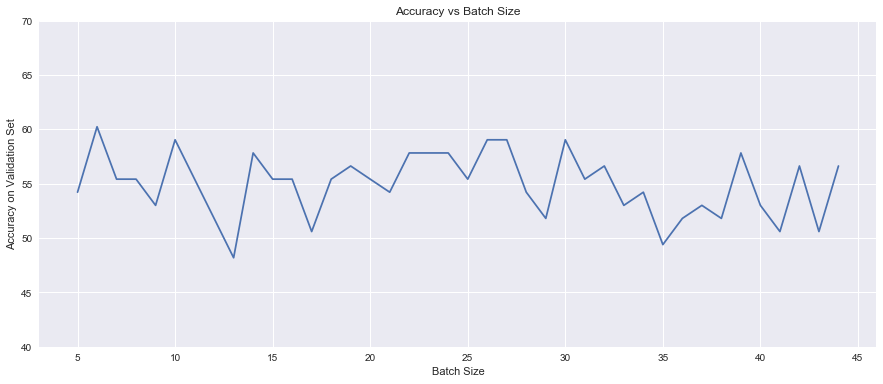

In [138]:
plt.ylim([40,70])
plt.plot(range(5,45),accuracy_validation)
plt.title("Accuracy vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy on Validation Set")

In [142]:
accuracy_test = [None]*10
count = 0
for nb_epoch in range(50,60):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu', input_dim = 20))
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 15))
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 6))
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 6, nb_epoch = nb_epoch)
    accuracy_test[count]=np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)
    count+=1# Adding the input layer and the first hidden layer


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=15, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=15, units=6, kernel_initializer="uniform")`
  import sys
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=6, units=6, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in

Epoch 1/50
193/193 [==============================] - 7s 36ms/step - loss: 0.6932 - acc: 0.5078
Epoch 2/50
193/193 [==============================] - 0s 1ms/step - loss: 0.6932 - acc: 0.5130
Epoch 3/50
193/193 [==============================] - 0s 2ms/step - loss: 0.6930 - acc: 0.5130
Epoch 4/50
193/193 [==============================] - 0s 1ms/step - loss: 0.6931 - acc: 0.5130
Epoch 5/50
193/193 [==============================] - 0s 1ms/step - loss: 0.6931 - acc: 0.5130
Epoch 6/50
193/193 [==============================] - 0s 1ms/step - loss: 0.6930 - acc: 0.5130
Epoch 7/50
193/193 [==============================] - 0s 1ms/step - loss: 0.6930 - acc: 0.5130
Epoch 8/50
193/193 [==============================] - 0s 1ms/step - loss: 0.6930 - acc: 0.5130
Epoch 9/50
193/193 [==============================] - 0s 1ms/step - loss: 0.6930 - acc: 0.5130
Epoch 10/50
193/193 [==============================] - 0s 946us/step - loss: 0.6930 - acc: 0.5130 0s - loss: 0.6931 - acc: 0.505
Epoch 11/50
193

193/193 [==============================] - 0s 878us/step - loss: 0.2373 - acc: 0.9326
Epoch 35/51
193/193 [==============================] - 0s 780us/step - loss: 0.2340 - acc: 0.9326
Epoch 36/51
193/193 [==============================] - 0s 811us/step - loss: 0.2217 - acc: 0.9430
Epoch 37/51
193/193 [==============================] - 0s 816us/step - loss: 0.2156 - acc: 0.9430
Epoch 38/51
193/193 [==============================] - 0s 786us/step - loss: 0.2100 - acc: 0.9482
Epoch 39/51
193/193 [==============================] - 0s 770us/step - loss: 0.2042 - acc: 0.9482
Epoch 40/51
193/193 [==============================] - 0s 801us/step - loss: 0.1983 - acc: 0.9430
Epoch 41/51
193/193 [==============================] - 0s 791us/step - loss: 0.1925 - acc: 0.9482
Epoch 42/51
193/193 [==============================] - 0s 822us/step - loss: 0.1878 - acc: 0.9430
Epoch 43/51
193/193 [==============================] - 0s 796us/step - loss: 0.1822 - acc: 0.9585
Epoch 44/51
193/193 [===========

193/193 [==============================] - 0s 817us/step - loss: 0.4840 - acc: 0.8705
Epoch 15/53
193/193 [==============================] - 0s 796us/step - loss: 0.4725 - acc: 0.8808
Epoch 16/53
193/193 [==============================] - 0s 791us/step - loss: 0.4607 - acc: 0.8808
Epoch 17/53
193/193 [==============================] - 0s 796us/step - loss: 0.4469 - acc: 0.8808
Epoch 18/53
193/193 [==============================] - 0s 822us/step - loss: 0.4292 - acc: 0.8964
Epoch 19/53
193/193 [==============================] - 0s 894us/step - loss: 0.4014 - acc: 0.9119
Epoch 20/53
193/193 [==============================] - 0s 806us/step - loss: 0.3763 - acc: 0.9119
Epoch 21/53
193/193 [==============================] - 0s 791us/step - loss: 0.3485 - acc: 0.9223
Epoch 22/53
193/193 [==============================] - 0s 1ms/step - loss: 0.3229 - acc: 0.9378
Epoch 23/53
193/193 [==============================] - 0s 1ms/step - loss: 0.2940 - acc: 0.9430
Epoch 24/53
193/193 [===============

193/193 [==============================] - 0s 811us/step - loss: 0.1647 - acc: 0.9430
Epoch 45/54
193/193 [==============================] - 0s 811us/step - loss: 0.1616 - acc: 0.9430
Epoch 46/54
193/193 [==============================] - 0s 786us/step - loss: 0.1576 - acc: 0.9430
Epoch 47/54
193/193 [==============================] - 0s 791us/step - loss: 0.1540 - acc: 0.9430
Epoch 48/54
193/193 [==============================] - 0s 832us/step - loss: 0.1512 - acc: 0.9430
Epoch 49/54
193/193 [==============================] - 0s 785us/step - loss: 0.1477 - acc: 0.9430
Epoch 50/54
193/193 [==============================] - 0s 858us/step - loss: 0.1509 - acc: 0.9378
Epoch 51/54
193/193 [==============================] - 0s 796us/step - loss: 0.1364 - acc: 0.9482
Epoch 52/54
193/193 [==============================] - 0s 837us/step - loss: 0.1366 - acc: 0.9534
Epoch 53/54
193/193 [==============================] - 0s 1ms/step - loss: 0.1237 - acc: 0.9534
Epoch 54/54
193/193 [=============

193/193 [==============================] - 0s 827us/step - loss: 0.3387 - acc: 0.8964
Epoch 20/56
193/193 [==============================] - 0s 816us/step - loss: 0.3285 - acc: 0.9016
Epoch 21/56
193/193 [==============================] - 0s 822us/step - loss: 0.3211 - acc: 0.9016
Epoch 22/56
193/193 [==============================] - 0s 822us/step - loss: 0.3167 - acc: 0.8964
Epoch 23/56
193/193 [==============================] - 0s 796us/step - loss: 0.3068 - acc: 0.9016
Epoch 24/56
193/193 [==============================] - 0s 811us/step - loss: 0.2984 - acc: 0.9171
Epoch 25/56
193/193 [==============================] - 0s 827us/step - loss: 0.2905 - acc: 0.9171
Epoch 26/56
193/193 [==============================] - 0s 873us/step - loss: 0.2832 - acc: 0.9119
Epoch 27/56
193/193 [==============================] - 0s 796us/step - loss: 0.2765 - acc: 0.9119
Epoch 28/56
193/193 [==============================] - 0s 817us/step - loss: 0.2676 - acc: 0.9119
Epoch 29/56
193/193 [===========

Epoch 47/57
193/193 [==============================] - 0s 816us/step - loss: 0.0664 - acc: 0.9896
Epoch 48/57
193/193 [==============================] - 0s 806us/step - loss: 0.0617 - acc: 0.9896
Epoch 49/57
193/193 [==============================] - 0s 868us/step - loss: 0.0550 - acc: 0.9896
Epoch 50/57
193/193 [==============================] - 0s 806us/step - loss: 0.0475 - acc: 0.9948
Epoch 51/57
193/193 [==============================] - 0s 811us/step - loss: 0.0408 - acc: 1.0000
Epoch 52/57
193/193 [==============================] - 0s 816us/step - loss: 0.0364 - acc: 1.0000
Epoch 53/57
193/193 [==============================] - 0s 837us/step - loss: 0.0337 - acc: 1.0000
Epoch 54/57
193/193 [==============================] - 0s 801us/step - loss: 0.0304 - acc: 1.0000
Epoch 55/57
193/193 [==============================] - 0s 847us/step - loss: 0.0309 - acc: 1.0000
Epoch 56/57
193/193 [==============================] - 0s 806us/step - loss: 0.0266 - acc: 1.0000
Epoch 57/57
193/193 

Epoch 16/59
193/193 [==============================] - 0s 915us/step - loss: 0.3551 - acc: 0.8860
Epoch 17/59
193/193 [==============================] - 0s 837us/step - loss: 0.3480 - acc: 0.8860
Epoch 18/59
193/193 [==============================] - 0s 816us/step - loss: 0.3397 - acc: 0.8860
Epoch 19/59
193/193 [==============================] - 0s 837us/step - loss: 0.3295 - acc: 0.8912
Epoch 20/59
193/193 [==============================] - 0s 822us/step - loss: 0.3200 - acc: 0.8964
Epoch 21/59
193/193 [==============================] - 0s 992us/step - loss: 0.3103 - acc: 0.9016
Epoch 22/59
193/193 [==============================] - 0s 842us/step - loss: 0.3038 - acc: 0.9119
Epoch 23/59
193/193 [==============================] - 0s 811us/step - loss: 0.3011 - acc: 0.9067
Epoch 24/59
193/193 [==============================] - 0s 842us/step - loss: 0.2884 - acc: 0.9119
Epoch 25/59
193/193 [==============================] - 0s 827us/step - loss: 0.2822 - acc: 0.9171
Epoch 26/59
193/193 

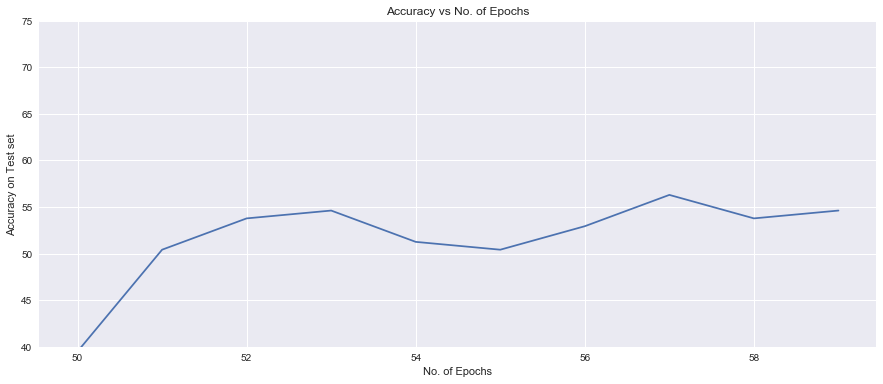

In [143]:
plt.ylim([40,75])
plt.plot(range(50,60),accuracy_test)
plt.title("Accuracy vs No. of Epochs")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy on Test set")

In [145]:
print('Test accuracy after pca dimensionality reduction',max(accuracy_test),'%')   

Test accuracy after pca dimensionality reduction 56.3 %


In [146]:
kmeans = KMeans(n_clusters=2,random_state=0)
X = sc.fit_transform(df.drop(["G3"],axis = 1))

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [147]:
predictions_KMeans = kmeans.predict(X)

In [148]:
Gaussian.fit(X)

predictions = Gaussian.predict(X)
probs_EM = Gaussian.predict_proba(X)

In [149]:
new_Df = pd.DataFrame()
data = pd.DataFrame({"KM_Pred": predictions_KMeans,"EM_Prob": probs_EM[:,1],"Grade level": df['G3']})
new_Df=new_Df.append(data)

In [150]:
new_Df

,KM_Pred,EM_Prob,Grade level
0,0,0.0,0
1,1,1.0,0
2,1,1.0,0
3,0,0.0,1
4,1,1.0,0
5,0,1.0,1
6,1,1.0,1
7,0,0.0,0
8,0,1.0,1
9,0,1.0,1


In [154]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(new_Df, test_size=0.3,random_state=23)


X_train=train.iloc[:,:2]
y_train=train.iloc[:,2]
X_test=test.iloc[:,:2]
y_test=test.iloc[:,2]


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_val = X_sca.fit_transform(X_val)
X_test = X_sca.transform(X_test)




In [159]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu', input_dim = 2))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=1, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
193/193 [==============================] - 9s 45ms/step - loss: 0.6932 - acc: 0.5130
Epoch 2/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6931 - acc: 0.5130
Epoch 3/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6931 - acc: 0.5130
Epoch 4/20
193/193 [==============================] - 0s 986us/step - loss: 0.6931 - acc: 0.5130
Epoch 5/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6931 - acc: 0.5130
Epoch 6/20
193/193 [==============================] - 0s 2ms/step - loss: 0.6930 - acc: 0.5130
Epoch 7/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6930 - acc: 0.5130
Epoch 8/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6930 - acc: 0.5130
Epoch 9/20
193/193 [==============================] - 0s 2ms/step - loss: 0.6930 - acc: 0.5130
Epoch 10/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6930 - acc: 0.5130
Epoch 11/20
193/193 [=========================

In [160]:
from sklearn.metrics import confusion_matrix


def accuracy_NN(classifier,X,y):
    # Predicting the Test set results
    y_pred = classifier.predict(X)
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y.values, y_pred)
    return (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [161]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))

Train accuracy = 51.3%
Test accuracy = 39.5%


In [169]:
accuracy_validation = [None]*10
for NoOfHiddenLayers in range(0,10):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 2))
    i=0
    # N Number of Hidden Layers
    while(i < NoOfHiddenLayers):
        classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu'))
        i+=1
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)
    accuracy_validation[NoOfHiddenLayers]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=20, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
193/193 [==============================] - 10s 49ms/step - loss: 0.6924 - acc: 0.6321
Epoch 2/20
193/193 [==============================] - 0s 731us/step - loss: 0.6909 - acc: 0.6477
Epoch 3/20
193/193 [==============================] - 0s 760us/step - loss: 0.6894 - acc: 0.6477
Epoch 4/20
193/193 [==============================] - 0s 748us/step - loss: 0.6873 - acc: 0.6477
Epoch 5/20
193/193 [==============================] - 0s 681us/step - loss: 0.6842 - acc: 0.6425
Epoch 6/20
193/193 [==============================] - 0s 707us/step - loss: 0.6802 - acc: 0.6477
Epoch 7/20
193/193 [==============================] - 0s 634us/step - loss: 0.6761 - acc: 0.6477
Epoch 8/20
193/193 [==============================] - 0s 878us/step - loss: 0.6720 - acc: 0.6477
Epoch 9/20
193/193 [==============================] - 0s 830us/step - loss: 0.6685 - acc: 0.6477
Epoch 10/20
193/193 [==============================] - 0s 756us/step - loss: 0.6644 - acc: 0.6477
Epoch 11/20
193/193 [========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
193/193 [==============================] - 10s 50ms/step - loss: 0.6936 - acc: 0.4715
Epoch 2/20
193/193 [==============================] - 0s 870us/step - loss: 0.6931 - acc: 0.4819
Epoch 3/20
193/193 [==============================] - 0s 800us/step - loss: 0.6930 - acc: 0.4715
Epoch 4/20
193/193 [==============================] - 0s 703us/step - loss: 0.6924 - acc: 0.6477
Epoch 5/20
193/193 [==============================] - 0s 785us/step - loss: 0.6912 - acc: 0.6425
Epoch 6/20
193/193 [==============================] - 0s 821us/step - loss: 0.6885 - acc: 0.6425
Epoch 7/20
193/193 [==============================] - 0s 862us/step - loss: 0.6846 - acc: 0.6425
Epoch 8/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6800 - acc: 0.6477
Epoch 9/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6757 - acc: 0.6477
Epoch 10/20
193/193 [==============================] - 0s 932us/step - loss: 0.6724 - acc: 0.6477
Epoch 11/20
193/193 [============

193/193 [==============================] - 0s 757us/step - loss: 0.6930 - acc: 0.5130
Epoch 6/20
193/193 [==============================] - 0s 737us/step - loss: 0.6930 - acc: 0.5130
Epoch 7/20
193/193 [==============================] - 0s 733us/step - loss: 0.6930 - acc: 0.5130
Epoch 8/20
193/193 [==============================] - 0s 664us/step - loss: 0.6930 - acc: 0.5130
Epoch 9/20
193/193 [==============================] - 0s 612us/step - loss: 0.6930 - acc: 0.5130
Epoch 10/20
193/193 [==============================] - 0s 767us/step - loss: 0.6929 - acc: 0.5130
Epoch 11/20
193/193 [==============================] - 0s 800us/step - loss: 0.6930 - acc: 0.5130
Epoch 12/20
193/193 [==============================] - 0s 807us/step - loss: 0.6930 - acc: 0.5130
Epoch 13/20
193/193 [==============================] - 0s 734us/step - loss: 0.6930 - acc: 0.5130
Epoch 14/20
193/193 [==============================] - 0s 746us/step - loss: 0.6929 - acc: 0.5130
Epoch 15/20
193/193 [===============

193/193 [==============================] - 0s 958us/step - loss: 0.6930 - acc: 0.5130
Epoch 9/20
193/193 [==============================] - 0s 737us/step - loss: 0.6930 - acc: 0.5130
Epoch 10/20
193/193 [==============================] - 0s 719us/step - loss: 0.6930 - acc: 0.5130
Epoch 11/20
193/193 [==============================] - 0s 789us/step - loss: 0.6930 - acc: 0.5130
Epoch 12/20
193/193 [==============================] - 0s 695us/step - loss: 0.6929 - acc: 0.5130
Epoch 13/20
193/193 [==============================] - 0s 752us/step - loss: 0.6929 - acc: 0.5130
Epoch 14/20
193/193 [==============================] - 0s 933us/step - loss: 0.6929 - acc: 0.5130
Epoch 15/20
193/193 [==============================] - 0s 726us/step - loss: 0.6929 - acc: 0.5130
Epoch 16/20
193/193 [==============================] - 0s 759us/step - loss: 0.6929 - acc: 0.5130
Epoch 17/20
193/193 [==============================] - 0s 815us/step - loss: 0.6929 - acc: 0.5130
Epoch 18/20
193/193 [============

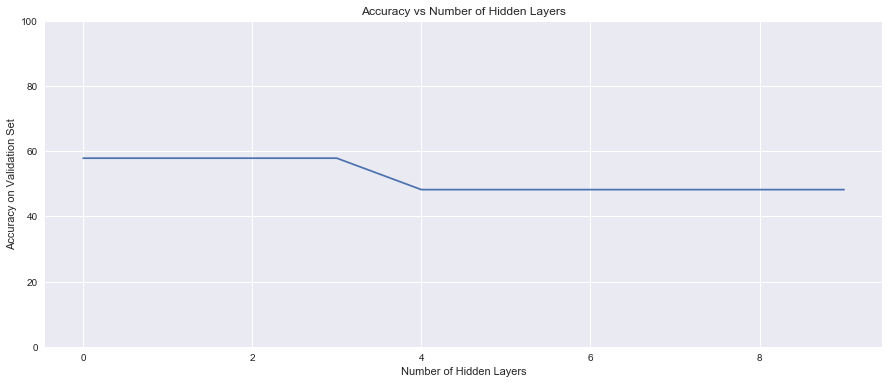

In [170]:
plt.ylim([0,100])
plt.plot(accuracy_validation)
plt.title("Accuracy vs Number of Hidden Layers")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

In [173]:
accuracy_validation = [None]*10
count = 0
for NoOfNodes in range(20,30):
    
    classifier = Sequential()
    # First Layer + Hidden Layer
    classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 2))
    
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu', input_dim = 20))
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=20, kernel_initializer="uniform")`
  import sys
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=20, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
193/193 [==============================] - 11s 56ms/step - loss: 0.6932 - acc: 0.4819
Epoch 2/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6930 - acc: 0.5285
Epoch 3/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6923 - acc: 0.6321
Epoch 4/20
193/193 [==============================] - 0s 838us/step - loss: 0.6907 - acc: 0.6425
Epoch 5/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6873 - acc: 0.6425
Epoch 6/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6825 - acc: 0.6425
Epoch 7/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6766 - acc: 0.6477
Epoch 8/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6708 - acc: 0.6477
Epoch 9/20
193/193 [==============================] - 0s 2ms/step - loss: 0.6651 - acc: 0.6477
Epoch 10/20
193/193 [==============================] - 0s 2ms/step - loss: 0.6609 - acc: 0.6477
Epoch 11/20
193/193 [========================

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=21, kernel_initializer="uniform")`
  if __name__ == '__main__':


Epoch 1/20
193/193 [==============================] - 11s 55ms/step - loss: 0.6933 - acc: 0.4870
Epoch 2/20
193/193 [==============================] - 0s 941us/step - loss: 0.6928 - acc: 0.5855
Epoch 3/20
193/193 [==============================] - 0s 807us/step - loss: 0.6917 - acc: 0.6425
Epoch 4/20
193/193 [==============================] - 0s 842us/step - loss: 0.6892 - acc: 0.6425
Epoch 5/20
193/193 [==============================] - 0s 848us/step - loss: 0.6842 - acc: 0.6425
Epoch 6/20
193/193 [==============================] - 0s 821us/step - loss: 0.6759 - acc: 0.6477
Epoch 7/20
193/193 [==============================] - 0s 865us/step - loss: 0.6668 - acc: 0.6477
Epoch 8/20
193/193 [==============================] - 0s 770us/step - loss: 0.6593 - acc: 0.6477
Epoch 9/20
193/193 [==============================] - 0s 847us/step - loss: 0.6552 - acc: 0.6477
Epoch 10/20
193/193 [==============================] - 0s 930us/step - loss: 0.6515 - acc: 0.6477
Epoch 11/20
193/193 [========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=22, kernel_initializer="uniform")`
  if __name__ == '__main__':


Epoch 1/20
193/193 [==============================] - 10s 52ms/step - loss: 0.6930 - acc: 0.5803
Epoch 2/20
193/193 [==============================] - 0s 782us/step - loss: 0.6922 - acc: 0.6477
Epoch 3/20
193/193 [==============================] - 0s 921us/step - loss: 0.6908 - acc: 0.6477
Epoch 4/20
193/193 [==============================] - 0s 740us/step - loss: 0.6866 - acc: 0.6477
Epoch 5/20
193/193 [==============================] - 0s 733us/step - loss: 0.6817 - acc: 0.6477
Epoch 6/20
193/193 [==============================] - 0s 688us/step - loss: 0.6744 - acc: 0.6477
Epoch 7/20
193/193 [==============================] - 0s 806us/step - loss: 0.6662 - acc: 0.6477
Epoch 8/20
193/193 [==============================] - 0s 764us/step - loss: 0.6601 - acc: 0.6477
Epoch 9/20
193/193 [==============================] - 0s 715us/step - loss: 0.6552 - acc: 0.6477
Epoch 10/20
193/193 [==============================] - 0s 807us/step - loss: 0.6523 - acc: 0.6477
Epoch 11/20
193/193 [========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=23, kernel_initializer="uniform")`
  if __name__ == '__main__':


Epoch 1/20
193/193 [==============================] - 10s 51ms/step - loss: 0.6931 - acc: 0.5130
Epoch 2/20
193/193 [==============================] - 0s 782us/step - loss: 0.6926 - acc: 0.5078
Epoch 3/20
193/193 [==============================] - 0s 748us/step - loss: 0.6916 - acc: 0.6218
Epoch 4/20
193/193 [==============================] - 0s 714us/step - loss: 0.6893 - acc: 0.6477
Epoch 5/20
193/193 [==============================] - 0s 994us/step - loss: 0.6850 - acc: 0.6477
Epoch 6/20
193/193 [==============================] - 0s 903us/step - loss: 0.6786 - acc: 0.6477
Epoch 7/20
193/193 [==============================] - 0s 885us/step - loss: 0.6714 - acc: 0.6477
Epoch 8/20
193/193 [==============================] - 0s 845us/step - loss: 0.6664 - acc: 0.6477
Epoch 9/20
193/193 [==============================] - 0s 721us/step - loss: 0.6617 - acc: 0.6477
Epoch 10/20
193/193 [==============================] - 0s 720us/step - loss: 0.6588 - acc: 0.6477
Epoch 11/20
193/193 [========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=24, kernel_initializer="uniform")`
  if __name__ == '__main__':


Epoch 1/20
193/193 [==============================] - 10s 54ms/step - loss: 0.6931 - acc: 0.5130
Epoch 2/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6927 - acc: 0.5907
Epoch 3/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6914 - acc: 0.5492
Epoch 4/20
193/193 [==============================] - ETA: 0s - loss: 0.6888 - acc: 0.642 - 0s 1ms/step - loss: 0.6884 - acc: 0.6477
Epoch 5/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6832 - acc: 0.6477
Epoch 6/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6766 - acc: 0.6477
Epoch 7/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6691 - acc: 0.6477
Epoch 8/20
193/193 [==============================] - 0s 681us/step - loss: 0.6619 - acc: 0.6477
Epoch 9/20
193/193 [==============================] - 0s 939us/step - loss: 0.6578 - acc: 0.6477
Epoch 10/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6544 - acc: 0.6477
Epoch

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=25, kernel_initializer="uniform")`
  if __name__ == '__main__':


Epoch 1/20
193/193 [==============================] - 10s 53ms/step - loss: 0.6932 - acc: 0.5130
Epoch 2/20
193/193 [==============================] - 0s 726us/step - loss: 0.6928 - acc: 0.5389
Epoch 3/20
193/193 [==============================] - 0s 731us/step - loss: 0.6920 - acc: 0.6477
Epoch 4/20
193/193 [==============================] - 0s 751us/step - loss: 0.6900 - acc: 0.6477
Epoch 5/20
193/193 [==============================] - 0s 749us/step - loss: 0.6853 - acc: 0.6477
Epoch 6/20
193/193 [==============================] - 0s 733us/step - loss: 0.6776 - acc: 0.6477
Epoch 7/20
193/193 [==============================] - 0s 744us/step - loss: 0.6680 - acc: 0.6477
Epoch 8/20
193/193 [==============================] - 0s 763us/step - loss: 0.6605 - acc: 0.6477
Epoch 9/20
193/193 [==============================] - 0s 690us/step - loss: 0.6551 - acc: 0.6477
Epoch 10/20
193/193 [==============================] - 0s 772us/step - loss: 0.6523 - acc: 0.6477
Epoch 11/20
193/193 [========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=26, kernel_initializer="uniform")`
  if __name__ == '__main__':


Epoch 1/20
193/193 [==============================] - 10s 52ms/step - loss: 0.6931 - acc: 0.4870
Epoch 2/20
193/193 [==============================] - 0s 770us/step - loss: 0.6927 - acc: 0.5855
Epoch 3/20
193/193 [==============================] - 0s 695us/step - loss: 0.6915 - acc: 0.6477
Epoch 4/20
193/193 [==============================] - 0s 749us/step - loss: 0.6887 - acc: 0.6477
Epoch 5/20
193/193 [==============================] - 0s 1ms/step - loss: 0.6844 - acc: 0.6477
Epoch 6/20
193/193 [==============================] - 0s 934us/step - loss: 0.6761 - acc: 0.6477
Epoch 7/20
193/193 [==============================] - 0s 888us/step - loss: 0.6666 - acc: 0.6477
Epoch 8/20
193/193 [==============================] - 0s 744us/step - loss: 0.6580 - acc: 0.6477
Epoch 9/20
193/193 [==============================] - 0s 757us/step - loss: 0.6510 - acc: 0.6477
Epoch 10/20
193/193 [==============================] - 0s 723us/step - loss: 0.6500 - acc: 0.6477
Epoch 11/20
193/193 [==========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=27, kernel_initializer="uniform")`
  if __name__ == '__main__':


Epoch 1/20
193/193 [==============================] - 10s 54ms/step - loss: 0.6931 - acc: 0.4767
Epoch 2/20
193/193 [==============================] - 0s 775us/step - loss: 0.6927 - acc: 0.5907
Epoch 3/20
193/193 [==============================] - 0s 696us/step - loss: 0.6917 - acc: 0.6477
Epoch 4/20
193/193 [==============================] - 0s 784us/step - loss: 0.6891 - acc: 0.6477
Epoch 5/20
193/193 [==============================] - 0s 716us/step - loss: 0.6837 - acc: 0.6477
Epoch 6/20
193/193 [==============================] - 0s 728us/step - loss: 0.6756 - acc: 0.6477
Epoch 7/20
193/193 [==============================] - 0s 744us/step - loss: 0.6679 - acc: 0.6477
Epoch 8/20
193/193 [==============================] - 0s 746us/step - loss: 0.6614 - acc: 0.6477
Epoch 9/20
193/193 [==============================] - 0s 721us/step - loss: 0.6561 - acc: 0.6477
Epoch 10/20
193/193 [==============================] - 0s 676us/step - loss: 0.6524 - acc: 0.6477
Epoch 11/20
193/193 [========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=28, kernel_initializer="uniform")`
  if __name__ == '__main__':


Epoch 1/20
193/193 [==============================] - 12s 63ms/step - loss: 0.6931 - acc: 0.4974
Epoch 2/20
193/193 [==============================] - 0s 826us/step - loss: 0.6927 - acc: 0.5596
Epoch 3/20
193/193 [==============================] - 0s 730us/step - loss: 0.6914 - acc: 0.5803
Epoch 4/20
193/193 [==============================] - 0s 749us/step - loss: 0.6879 - acc: 0.6477
Epoch 5/20
193/193 [==============================] - 0s 805us/step - loss: 0.6815 - acc: 0.6477
Epoch 6/20
193/193 [==============================] - 0s 755us/step - loss: 0.6724 - acc: 0.6477
Epoch 7/20
193/193 [==============================] - 0s 761us/step - loss: 0.6662 - acc: 0.6477
Epoch 8/20
193/193 [==============================] - 0s 759us/step - loss: 0.6615 - acc: 0.6477
Epoch 9/20
193/193 [==============================] - 0s 954us/step - loss: 0.6567 - acc: 0.6477
Epoch 10/20
193/193 [==============================] - 0s 2ms/step - loss: 0.6534 - acc: 0.6477
Epoch 11/20
193/193 [==========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=29, kernel_initializer="uniform")`
  if __name__ == '__main__':


Epoch 1/20
193/193 [==============================] - 10s 54ms/step - loss: 0.6931 - acc: 0.5130
Epoch 2/20
193/193 [==============================] - 0s 761us/step - loss: 0.6927 - acc: 0.6114
Epoch 3/20
193/193 [==============================] - 0s 757us/step - loss: 0.6919 - acc: 0.6477
Epoch 4/20
193/193 [==============================] - 0s 626us/step - loss: 0.6900 - acc: 0.6425
Epoch 5/20
193/193 [==============================] - 0s 781us/step - loss: 0.6865 - acc: 0.6477
Epoch 6/20
193/193 [==============================] - 0s 765us/step - loss: 0.6806 - acc: 0.6477
Epoch 7/20
193/193 [==============================] - 0s 685us/step - loss: 0.6728 - acc: 0.6477
Epoch 8/20
193/193 [==============================] - 0s 791us/step - loss: 0.6643 - acc: 0.6477
Epoch 9/20
193/193 [==============================] - 0s 699us/step - loss: 0.6576 - acc: 0.6477
Epoch 10/20
193/193 [==============================] - 0s 822us/step - loss: 0.6532 - acc: 0.6477
Epoch 11/20
193/193 [========

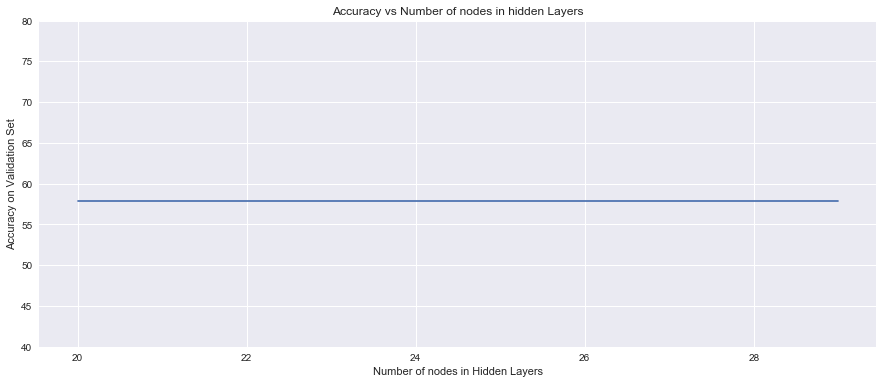

In [174]:
plt.ylim([40,80])
plt.plot(range(20,30),accuracy_validation)
plt.title("Accuracy vs Number of nodes in hidden Layers")
plt.xlabel("Number of nodes in Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

In [178]:
accuracy_validation = [None]*20
count = 0
for batchSize in range(5,25):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 2))
    classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu', input_dim = 20))
  
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = batchSize, nb_epoch = 10)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=20, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=5, kernel_initializer="uniform")`
  import sys
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
193/193 [==============================] - 13s 66ms/step - loss: 0.6931 - acc: 0.5233
Epoch 2/10
193/193 [==============================] - 0s 2ms/step - loss: 0.6926 - acc: 0.6321
Epoch 3/10
193/193 [==============================] - 0s 2ms/step - loss: 0.6915 - acc: 0.6477
Epoch 4/10
193/193 [==============================] - 0s 2ms/step - loss: 0.6889 - acc: 0.6477
Epoch 5/10
193/193 [==============================] - 0s 2ms/step - loss: 0.6847 - acc: 0.6477
Epoch 6/10
193/193 [==============================] - 0s 2ms/step - loss: 0.6793 - acc: 0.6477
Epoch 7/10
193/193 [==============================] - 0s 2ms/step - loss: 0.6724 - acc: 0.6477
Epoch 8/10
193/193 [==============================] - 0s 2ms/step - loss: 0.6655 - acc: 0.6477
Epoch 9/10
193/193 [==============================] - 0s 2ms/step - loss: 0.6600 - acc: 0.6477
Epoch 10/10
193/193 [==============================] - 0s 2ms/step - loss: 0.6561 - acc: 0.6477
Epoch 1/10
193/193 [===========================

193/193 [==============================] - 0s 609us/step - loss: 0.6911 - acc: 0.6425
Epoch 7/10
193/193 [==============================] - 0s 561us/step - loss: 0.6896 - acc: 0.6425
Epoch 8/10
193/193 [==============================] - 0s 623us/step - loss: 0.6871 - acc: 0.6425
Epoch 9/10
193/193 [==============================] - 0s 606us/step - loss: 0.6842 - acc: 0.6425
Epoch 10/10
193/193 [==============================] - 0s 575us/step - loss: 0.6810 - acc: 0.6425
Epoch 1/10
193/193 [==============================] - 12s 61ms/step - loss: 0.6931 - acc: 0.5337
Epoch 2/10
193/193 [==============================] - 0s 584us/step - loss: 0.6929 - acc: 0.5130
Epoch 3/10
193/193 [==============================] - 0s 528us/step - loss: 0.6926 - acc: 0.5648
Epoch 4/10
193/193 [==============================] - 0s 615us/step - loss: 0.6919 - acc: 0.5907
Epoch 5/10
193/193 [==============================] - 0s 569us/step - loss: 0.6907 - acc: 0.6477
Epoch 6/10
193/193 [====================

193/193 [==============================] - 0s 374us/step - loss: 0.6879 - acc: 0.6477
Epoch 1/10
193/193 [==============================] - 13s 65ms/step - loss: 0.6931 - acc: 0.5130
Epoch 2/10
193/193 [==============================] - 0s 384us/step - loss: 0.6931 - acc: 0.5130
Epoch 3/10
193/193 [==============================] - 0s 331us/step - loss: 0.6929 - acc: 0.5130
Epoch 4/10
193/193 [==============================] - 0s 324us/step - loss: 0.6927 - acc: 0.5130
Epoch 5/10
193/193 [==============================] - 0s 358us/step - loss: 0.6925 - acc: 0.5130
Epoch 6/10
193/193 [==============================] - 0s 277us/step - loss: 0.6921 - acc: 0.5130
Epoch 7/10
193/193 [==============================] - 0s 405us/step - loss: 0.6914 - acc: 0.5130
Epoch 8/10
193/193 [==============================] - 0s 358us/step - loss: 0.6908 - acc: 0.5130
Epoch 9/10
193/193 [==============================] - 0s 358us/step - loss: 0.6895 - acc: 0.5803
Epoch 10/10
193/193 [====================

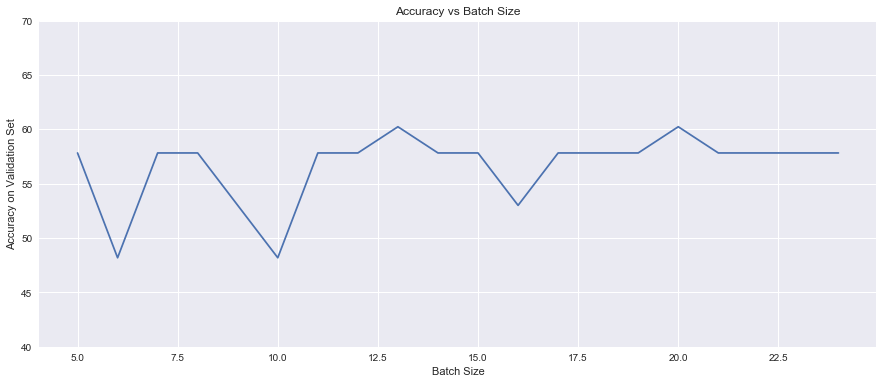

In [179]:
plt.ylim([40,70])
plt.plot(range(5,25),accuracy_validation)
plt.title("Accuracy vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy on Validation Set")

In [ ]:
accuracy_test = [None]*10
count = 0
for nb_epoch in range(10,20):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 2))
    classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 20))
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 13, nb_epoch = nb_epoch)
    accuracy_test[count]=np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)
    count+=1

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=20, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=20, kernel_initializer="uniform")`
  import sys
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
193/193 [==============================] - 15s 78ms/step - loss: 0.6931 - acc: 0.4870
Epoch 2/10
193/193 [==============================] - 0s 738us/step - loss: 0.6926 - acc: 0.6477
Epoch 3/10
193/193 [==============================] - 0s 887us/step - loss: 0.6917 - acc: 0.6477
Epoch 4/10
193/193 [==============================] - 0s 752us/step - loss: 0.6901 - acc: 0.6477
Epoch 5/10
193/193 [==============================] - 0s 815us/step - loss: 0.6872 - acc: 0.6477
Epoch 6/10
193/193 [==============================] - 0s 847us/step - loss: 0.6833 - acc: 0.6477
Epoch 7/10
193/193 [==============================] - 0s 804us/step - loss: 0.6774 - acc: 0.6477
Epoch 8/10
193/193 [==============================] - 0s 715us/step - loss: 0.6711 - acc: 0.6477
Epoch 9/10
193/193 [==============================] - 0s 782us/step - loss: 0.6652 - acc: 0.6477
Epoch 10/10
193/193 [==============================] - 0s 795us/step - loss: 0.6599 - acc: 0.6477
Epoch 1/11
193/193 [=========

193/193 [==============================] - 0s 822us/step - loss: 0.6560 - acc: 0.6477
Epoch 11/16
193/193 [==============================] - 0s 711us/step - loss: 0.6529 - acc: 0.6477
Epoch 12/16
193/193 [==============================] - 0s 631us/step - loss: 0.6514 - acc: 0.6477
Epoch 13/16
193/193 [==============================] - 0s 680us/step - loss: 0.6501 - acc: 0.6477
Epoch 14/16
193/193 [==============================] - 0s 633us/step - loss: 0.6492 - acc: 0.6477
Epoch 15/16
193/193 [==============================] - 0s 662us/step - loss: 0.6490 - acc: 0.6477
Epoch 16/16
193/193 [==============================] - 0s 665us/step - loss: 0.6487 - acc: 0.6477
Epoch 1/17
193/193 [==============================] - 15s 75ms/step - loss: 0.6931 - acc: 0.5544
Epoch 2/17
193/193 [==============================] - 0s 713us/step - loss: 0.6928 - acc: 0.6477
Epoch 3/17
193/193 [==============================] - 0s 684us/step - loss: 0.6921 - acc: 0.6477
Epoch 4/17
193/193 [===============

In [ ]:
plt.ylim([40,75])
plt.plot(range(10,20),accuracy_test)
plt.title("Accuracy vs No. of Epochs")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy on Test set")
print('Test accuracy after pca dimensionality reduction',max(accuracy_test),'%')